# **DESAFIO 1 G2** 
# **Dataset Properati - Analisis exploratorio y acondicionamiento de datos.**
---

<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

Dataset

$\hspace{.5cm}$[Observaciones generales](#section_og)
  
$\hspace{.5cm}$[Trabajo sobre variables](#section_tsv)

$\hspace{.9cm}$[Localización de propiedades](#section_tsv_glp)

$\hspace{.9cm}$[Valores de propiedades](#section_tsv_gvp)

$\hspace{.9cm}$[Dimension de propiedades](#section_tsv_gdp)

Imputaciones

$\hspace{.5cm}$[Expresiones regulares](#section_re)

$\hspace{.9cm}$[Principios generales](#section_re_pg)

$\hspace{.9cm}$[Precios](#section_regexp_pre)

$\hspace{.9cm}$[Ambientes](#section_regexp_amb)

$\hspace{.9cm}$[Metros cuadrados](#section_regexp_m2)

$\hspace{.9cm}$[Amenities](#section_regexp_ame)

Depuracion

$\hspace{.5cm}$[Borrado de registros duplicados](#section_drd)

$\hspace{.5cm}$[Borrado de registros sin información completa](#section_drii)

Visualizaciones basicas

$\hspace{.5cm}$[Venta departamentos CABA](#section_v_1)

$\hspace{.5cm}$[Venta casas y PHs CABA](#section_v_2)

$\hspace{.5cm}$[Venta casas y PHs CABA, Buenos Aires e Interior](#section_v_3)

$\hspace{.5cm}$[Venta casas CABA, Buenos Aires e Interior](#section_v_4)


---

<a id="section_intro"></a> 
## Intro

[volver a TOC](#section_toc)

Carga de DataFrame y exploracion inicial

In [1]:
import pandas as pd
import numpy as np
import re
import random

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_location = 'https://github.com/DHDSDesafios/DH_DS_desafio_1_propierati/raw/master/data/properati.zip'
data = pd.read_csv(data_location, compression='zip', encoding="utf-8")

In [4]:
pd.set_option('display.max_colwidth', 1500)
pd.set_option('display.max_rows', 400)

<a id="section_og"></a> 
### Observaciones Generales

[volver a TOC](#section_toc)

datosCol(serie) - Funcion que retorna diccionario con los datos de una Serie / Columna del DataFrame a analizar:

Campos:
 - nombre columna.
 - tipo de dato Pandas serie.
 - cantidad de registros en la serie.
 - cantidad de nulos en la serie.
 - cantidad de NO nulos en la serie.
 - porcentaje de No nulos en la serie.
 - cantidad de valores unicos en la serie.
 - valor mas repetido en la serie.
 - valor maximo en la serie.
 - valor minimos en la serie.
 - media, mediana y desvio estandar en la serie.
 - distribucion de cuantiles.
 - tipos de datos sobre los valores incluidos en la serie.

In [5]:
def datosCol(col=None):
    try:
        if col.dtype != object:
            return {
                    'nombre': col.name,
                    'series_dt': col.dtype,
                    'registros': int(len(col)), 
                    'nulos': int(len(col) - col.describe()[0]), 
                    'nulos_porcentaje': round(col.isnull().sum() / col.size*100, 2),
                    'nonulos': int(col.describe()[0]),
                    'nonulos_porcentraje': round(col.describe()[0] / col.shape[0], 2),
                    'unicos': int(len(col.value_counts())),
                    'mas_repetido': col.value_counts().index[0],
                    'minimo': round(col.min(), 2),
                    'maximo': round(col.max(), 2),
                    'media': round(col.describe()[1], 2),
                    'mediana': col.median(),
                    'desvio': round(col.describe()[2], 2),
                    'q25': col.describe()[4],
                    'q50': col.describe()[5],
                    'q75': col.describe()[6],
                    'values_dt': [x for x in col.apply(lambda x: type(x)).value_counts().index]
                   }
        else:
            return {
                    'nombre': col.name,
                    'series_dt': col.dtype,
                    'registros': int(col.describe()[0]),
                    'nulos': col.isnull().sum(),
                    'nulos_porcentaje': round(col.isnull().sum() / col.size*100, 2),
                    'nonulos': int(col.notnull().sum()),
                    'nonulos_porcentraje': round(col.notnull().sum() / col.size*100, 2),
                    'unicos': int(col.describe()[1]), 
                    'mas_repetido': col.describe()[2],
                    'nulos': col.isnull().sum(),
                    'frecuencia': int(col.describe()[3]),
                    'values_dt': [x for x in col.apply(lambda x: type(x)).value_counts().index]
                   }
    except:
        return 'use a valid pandas Series'

In [6]:
data_info = pd.DataFrame([datosCol(data[x]) for x in data.columns ])

In [7]:
data_info

,nombre,series_dt,registros,nulos,nulos_porcentaje,nonulos,nonulos_porcentraje,unicos,mas_repetido,minimo,maximo,media,mediana,desvio,q25,q50,q75,values_dt,frecuencia
0,Unnamed: 0,int64,121220,0,0.00,121220,1.00,121220,2047,0.00,1.212190e+05,60609.50,6.060950e+04,34993.34,3.030475e+04,6.060950e+04,9.091425e+04,[<class 'int'>],NaN
1,operation,object,121220,0,0.00,121220,100.00,1,sell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[<class 'str'>],121220.0
2,property_type,object,121220,0,0.00,121220,100.00,4,apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[<class 'str'>],71065.0
3,place_name,object,121197,23,0.02,121197,99.98,1060,Córdoba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[<class 'str'>, <class 'float'>]",9254.0
4,place_with_parent_names,object,121220,0,0.00,121220,100.00,1164,|Argentina|Santa Fe|Rosario|,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[<class 'str'>],8504.0
5,country_name,object,121220,0,0.00,121220,100.00,1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[<class 'str'>],121220.0
6,state_name,object,121220,0,0.00,121220,100.00,28,Capital Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[<class 'str'>],32316.0
7,geonames_id,float64,121220,18717,15.44,102503,0.85,646,3.83857e+06,3427208.00,6.948895e+06,3574442.32,3.433910e+06,354130.62,3.430234e+06,3.433910e+06,3.836668e+06,[<class 'float'>],NaN
8,lat-lon,object,69670,51550,42.53,69670,57.47,47203,"-34.4026444,-58.6684776",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[<class 'str'>, <class 'float'>]",312.0
9,lat,float64,121220,51550,42.53,69670,0.57,46495,-34.4026,-54.82,4.550000e+00,-34.63,-3.459799e+01,1.98,-3.466907e+01,-3.459799e+01,-3.444130e+01,[<class 'float'>],NaN


Ajustes generales

In [8]:
# renombro la columna que no tiene nombre
data = data.rename({           
    'Unnamed: 0': 'Id_caso'
}, axis=1)

<a id="section_pg"></a> 
## Trabajo sobre variables

Las tareas sobre las variables las organizamos de la siguiente manera:
* Agrupamos cada una de acuerdo a criterios comunes

[volver a TOC](#section_toc)

<img src='https://github.com/DHDSDesafios/DH_DS_desafio_1_propierati/raw/master/data/layout_analisis.JPG' align='center' width=50%/>

* De acuerdo a cada grupo, nos separamos su análisis pero definiendo objetivos generales:
    * Analisis de distribución.
    * Definición si la variable era necesaria o no.
    * Si alguna dependía o tenía su origen en otra.
    * Búsqueda de errores y tareas de corrección.
    * Política de llenado de valores nulos, si era posible.
    * Identificación y política de valores outliers.
* Trabajo de expresiones regulares para:
    * Identificar valores faltantes sobre variables existentes
    * Identificación de variables que sumen al objetivo.  Amenities.
* Búsqueda y eliminación de registros duplicados.
* Búsqueda y eliminación de registros únicos que finalmente no puedan ser utilizados para el cumplimiento del objetivo.
* Finalmente genearación de un nuevo DF.

---
<a id="section_tsv_glp"></a> 
### Variables del grupo de localización de propiedades

[volver a TOC](#section_toc)

Las tareas sobre las variables las organizamos de la siguiente manera:
* Agrupamos cada una de acuerdo a criterios comunes



Validación, limpieza y asignación de nulos; sobre las variables:

- `country_name` 
- `state_name`
- `place_name`
- `geonames_id`
- `place_with_parent_names`
- `lat-lon`
- `lat`
- `lon`

  **country_name**

In [9]:
# Confirmamos que la variable tiene un solo valor, por lo que es posible descartarla
data.country_name.value_counts()

Argentina    121220
Name: country_name, dtype: int64

  **state_name**

In [10]:
# Distribución de la variable
print (data.state_name.value_counts())
print ("--------------------------------------------------")
print ("Vemos que no existen valores por fuera del listado")

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

  **place_name**
  
  Validamos si los datos de la variable están completos y es un dato confiable, o si debemos realizar alguna terea sobre ellos.
  * Luego del trabajo exploratorio, vamos a confirmar que place_name correponde a la última parte de la variable `place_with_parent_names`:
      * Separamos `place_with_parent_names` en 5 variables nuevas:
          * Pais
          * Zona
          * Partido_barrio
          * Localidad
          * Obs_localidad

In [11]:
# vamos a determinadar si la variable 'place_name' tiene un dato 'confiable' o 'completo', 
# para eso separamos la variable 'place_with_parent_names' en partes, por el simbolo | (pipe) 
# separo la variable place_with_parent_names, sumando campos nuevos y ya trabajando sobre le nuevo dataframe
data = data.join(data["place_with_parent_names"].str.split('|', expand=True).rename(columns={
                                                                                                1:'Pais', 
                                                                                                2:'Zona', 
                                                                                                3:'Partido_barrio', 
                                                                                                4:'Localidad', 
                                                                                                5:'Obs_localidad', 
                                                                                                6:'Descarte'}))
data.drop(['Descarte'], axis='columns', inplace=True)

* Se recorren las variables creadas desde la última hasta encontrar un NO nulo se graba el valor encontrado en place_name_new
* Se compara la variable creada vs place_name original

Validamos que la variable `place_name` sea igual a el ultimo valor informado sobre `place_with_parent_names` ya separado por el proceso anterior.
Se desde la ultima variable hasta encontrar un NO nulo y se graba el valor:

 1. Obs_localidad
 2. Localidad
 3. Partido_barrio
 4. Zona
 
Creacion de una nueva serie `place_name_new` que se completara a medida que valide que cada variable tenga valor empezando desde la ultima seccion.

In [12]:
data["place_name_new"] = 'validar'
#para cada variable nuevo valido null o ''
#---------------------------------------------------------------------------
# creo mascara de los casos donde la varible 'x' tenga null o ''
mask_data_Obs_localidad_null =  (data.Obs_localidad.isnull()) | (data.Obs_localidad == '')
# creo otra mascara con origen en la mascara enterior para quedarme con los 
# que tienen valor en la variable 'x'
mask_data_Obs_localidad_notnull = mask_data_Obs_localidad_null == False

 1. Obs_localidad

In [13]:
print ('Cantidad de casos con Obs_localidad informada: ' + str(mask_data_Obs_localidad_notnull.sum()))
# creo una mascara sobre la variable que voy a ir completando con el valor obtenido
mask_data_place_name_new_validar = data.place_name_new == 'validar'
print ('Cantidad de casos con place_name_new original :' + str(mask_data_place_name_new_validar.sum()))
# actualizo los valores sobre mi nueva variable con los que encontré en la variable 'x'
data.loc[mask_data_Obs_localidad_notnull&mask_data_place_name_new_validar, "place_name_new"] = data.Obs_localidad
# actualizo la mascara sobre mi nueva variable para contar y ver si todo resultó ok!
mask_data_place_name_new_validar = data.place_name_new == 'validar'
print ('Cantidad de casos con place_name_new posterior para analizar: ' + str(mask_data_place_name_new_validar.sum()))
# la cantidad de casos sobre la variable nueva con valor 'validar' era de 121197
# La cantidad de casos sobre la misma variable con valor 'validar' despues de actualizar fue de 120649
# El delta corresponde a los valores con origen en el primer campo Obs_localidad ... 548

Cantidad de casos con Obs_localidad informada: 548
Cantidad de casos con place_name_new original :121220
Cantidad de casos con place_name_new posterior para analizar: 120672


 2. Localidad

In [14]:
mask_data_Localidad_null =  (data.Localidad.isnull()) | (data.Localidad == '')
mask_data_Localidad_notnull = mask_data_Localidad_null == False
print ('Localidad')
print ('Cantidad de casos con Localidad informada: ' + str(mask_data_Localidad_notnull.sum()))
mask_data_place_name_new_validar = data.place_name_new == 'validar'
print ('Cantidad de casos con place_name_new original: ' +  str(mask_data_place_name_new_validar.sum()))
data.loc[mask_data_Localidad_notnull&mask_data_place_name_new_validar, "place_name_new"] = data.Localidad
mask_data_place_name_new_validar = data.place_name_new == 'validar'
print ('Cantidad de casos con place_name_new posterior para analizar: ' + str(mask_data_place_name_new_validar.sum()))

Localidad
Cantidad de casos con Localidad informada: 40417
Cantidad de casos con place_name_new original: 120672
Cantidad de casos con place_name_new posterior para analizar: 80803


 3. Partido_barrio

In [15]:
mask_data_Partido_barrio_null =  (data.Partido_barrio.isnull()) | (data.Partido_barrio == '')
mask_data_Partido_barrio_notnull = mask_data_Partido_barrio_null == False
print ('Partido_barrio')
print ('Cantidad de casos con Partido_barrio informada: ' + str(mask_data_Partido_barrio_notnull.sum()))
mask_data_place_name_new_validar = data.place_name_new == 'validar'
print ('Cantidad de casos con place_name_new original: ' + str(mask_data_place_name_new_validar.sum()))
data.loc[mask_data_Partido_barrio_notnull&mask_data_place_name_new_validar, "place_name_new"] = data.Partido_barrio
mask_data_place_name_new_validar = data.place_name_new == 'validar'
print ('Cantidad de casos con place_name_new posterior para analizar: ' + str(mask_data_place_name_new_validar.sum()))

Partido_barrio
Cantidad de casos con Partido_barrio informada: 116440
Cantidad de casos con place_name_new original: 80803
Cantidad de casos con place_name_new posterior para analizar: 4780


4. Zona

In [16]:
mask_data_Zona_null =  (data.Zona.isnull()) | (data.Zona == '')
mask_data_Zona_notnull = mask_data_Zona_null == False
print ('Zona')
print ('Cantidad de casos con Zona informada: ' + str(mask_data_Zona_notnull.sum()))
mask_data_place_name_new_validar = data.place_name_new == 'validar'
print ('Cantidad de casos con place_name_new original: ' + str(mask_data_place_name_new_validar.sum()))
data.loc[mask_data_Zona_notnull&mask_data_place_name_new_validar, "place_name_new"] = data.Zona
mask_data_place_name_new_validar = data.place_name_new == 'validar'
print ('Cantidad de casos con place_name_new posterior para analizar: ' + str(mask_data_place_name_new_validar.sum()))

Zona
Cantidad de casos con Zona informada: 121220
Cantidad de casos con place_name_new original: 4780
Cantidad de casos con place_name_new posterior para analizar: 0


Conclusiones entre place_name_new y place_name

In [17]:
print ('Cantidad casos que coinciden entre place_name_new y place_name')
# valido si place_name_new da igual que place_name, si contamos lo mismo es que da igual
mask_place_name_validacion =  data.place_name_new == data.place_name
print(mask_place_name_validacion.value_counts())  
mask_place_name_validacion_falso = mask_place_name_validacion == False
print ('Vemos que casuiticas encontramos sobre los casos que no encontramos:')
print(data.loc[mask_place_name_validacion_falso, ["Id_caso","place_with_parent_names","place_name", "place_name_new"]].\
     groupby(["place_with_parent_names"])["Id_caso"].count())
print('Vemos que son todos del mismo place_with_parent_names de Tigre')
# lo normalizamos
print ('Los normalizamos sobre la variable place_name_new')
data.loc[mask_place_name_validacion_falso, "place_name_new"] = 'Tigre'
data.loc[mask_place_name_validacion_falso, "Localidad"] = 'Tigre'
print ('Validamos la actualización:')
print(data.loc[mask_place_name_validacion_falso, ["Id_caso", "place_name_new"]]\
     .groupby(["place_name_new"])["Id_caso"].count())
print('----------------------------------------------------------------------------')
print('Confirmamos que la variable creada - place_name_new - es igual a  place_name')

Cantidad casos que coinciden entre place_name_new y place_name
True     121197
False        23
dtype: int64
Vemos que casuiticas encontramos sobre los casos que no encontramos:
place_with_parent_names
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    23
Name: Id_caso, dtype: int64
Vemos que son todos del mismo place_with_parent_names de Tigre
Los normalizamos sobre la variable place_name_new
Validamos la actualización:
place_name_new
Tigre    23
Name: Id_caso, dtype: int64
----------------------------------------------------------------------------
Confirmamos que la variable creada - place_name_new - es igual a  place_name


* Creamos una nueva variable para identificar los casos sobre los que nos falta información de localización y luego analizar si corresponde descartar esos casos

`calidad_dato` nueva Serie para validar la calidad del dato `place_with_parent_names` luego de separarlo 

Dependiendo de la zona que estamos analizando entendemos que la cantidad de info que necesitamos para:

 - `['Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Oeste','Bs.As. G.B.A. Zona Sur']` el mínimo tendria que ser _Localidad_.
 - `['Buenos Aires Costa Atlántica']` y en especial MDQ el mínimo tendria que ser _Localidad_.
 - el resto de las zonas _Partido_barrio_.

Se actualizará la Serie creada (`calidad_dato`) a True que identificará los casos sobre los que necesitamos mayor información:

Para `['Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Oeste','Bs.As. G.B.A. Zona Sur']` se creara una lista de valores.

In [18]:
data["calidad_dato"] = False

# zonas a traves de una lista de valores
valores_zona = ['Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Oeste','Bs.As. G.B.A. Zona Sur']

# mascara sobre la lista de valores y que localidad este nulo o ''
mask_Localidad = ([x in valores_zona for x in data.Zona]) & ((data.Localidad.isnull())|(data.Localidad == ''))

# actualizo la variable creada sobre los True por la mascara
data.loc[mask_Localidad, "calidad_dato"] = True

# caso especial de MDQ
valores_zona_mdq = ['Buenos Aires Costa Atlántica']
mask_Localidad_mdq = ([x in valores_zona_mdq for x in data.Zona])\
& (data.Partido_barrio == 'Mar del Plata') & ((data.Localidad.isnull()) | (data.Localidad == ''))
data.loc[mask_Localidad, "calidad_dato"] = True

#resto_zonas
valores_zona_resto = ['Buenos Aires Costa Atlántica','Buenos Aires Interior','Capital Federal','Resto de provincias']
mask_Partido_barrio = ([x in valores_zona_resto for x in data.Zona]) & ((data.Partido_barrio.isnull())|\
                                                                                (data.Partido_barrio == ''))
mask_calidad_dato_false = data.calidad_dato == False
data.loc[mask_Partido_barrio & mask_calidad_dato_false, "calidad_dato"] = True
# ----------------------------------------------------------------------
# todos los casos con True corresponden a los registros sobre los que nos falta informacion referida a 
# la geolocalización de la propiedad
print ('Cantidad de casos a los que le falta información de localización:')
print ('-----------------------------------------------------------------')
print(data.calidad_dato.value_counts(), '\n')

# mascara sobre casos que nos faltaria info
mask_faltante = (data.calidad_dato == True)
data_faltante = data.loc[mask_faltante]

# agrupo por Pais, Zona, Partido_barrio los casos que no tenemos otra info
groupby_df_faltante = data_faltante.groupby(['Pais',  'Zona', 'Partido_barrio'])["Id_caso"].count().\
sort_values(ascending=False)
print ('Agrupación de los casos a los que le falta información de localización:')
print ('-----------------------------------------------------------------------')
groupby_df_faltante


Cantidad de casos a los que le falta información de localización:
-----------------------------------------------------------------
False    107421
True      13799
Name: calidad_dato, dtype: int64 

Agrupación de los casos a los que le falta información de localización:
-----------------------------------------------------------------------


Pais       Zona                          Partido_barrio     
Argentina  Bs.As. G.B.A. Zona Norte      Tigre                  2359
                                         Pilar                  1857
           Capital Federal                                      1297
           Bs.As. G.B.A. Zona Norte      Escobar                1037
           Bs.As. G.B.A. Zona Sur        La Plata                767
           Bs.As. G.B.A. Zona Norte      San Isidro              641
           Bs.As. G.B.A. Zona Oeste      Morón                   582
                                         Ituzaingó               474
           Bs.As. G.B.A. Zona Norte      San Fernando            437
           Bs.As. G.B.A. Zona Oeste      Moreno                  434
           Bs.As. G.B.A. Zona Norte      San Miguel              417
                                         General San Martín      382
           Bs.As. G.B.A. Zona Sur        Lomas de Zamora         276
           Bs.As. G.B.A. Zona Oeste      M

  **geonames_id**
  
  Del proceso exploratorio vemos que se corresponde a un Id sobre la variable place_name.  Vamos a:
  * Validar que No se asigne un mismo geonames_id a distintos valores de place_name_new
  * En caso que exista, vamos a definir la tarea de normalización sobre cada uno
  * Por último vamos a completar los valores nulos

*Validacion geonames_id*

In [19]:
# variable geonames_id,  corresponde al id asignado a cada place_name
# primero vamos a validar que No se asigne un mismo geonames_id a distintos valores de place_name_new
mask_geonames_id_nonull = data.geonames_id.notnull()
df_geonames_id_place_name_ag = data.loc[mask_geonames_id_nonull]

grouped = df_geonames_id_place_name_ag.groupby(['geonames_id',  'place_name_new'])
grouped1 = grouped['Id_caso'].agg([np.size])

df_agrupado2 = grouped1.groupby(['geonames_id']).filter(lambda grp: grp["size"].count() > 1)
print ('Casos que un mismo geonames_id tiene asignado más de un place_name')
print ('------------------------------------------------------------------')
print (df_agrupado2)

Casos que un mismo geonames_id tiene asignado más de un place_name
------------------------------------------------------------------
                                          size
geonames_id place_name_new                    
3428927.0   San Jose                         5
            San José                        11
3430234.0   Palermo                       2885
            Palermo Soho                   394
3433359.0   Ituzaingó                      832
            Villa Udaondo                   25
3435548.0   Centro                         231
            Centro / Microcentro           223
3435907.0   Bs.As. G.B.A. Zona Norte       222
            Bs.As. G.B.A. Zona Oeste        65
            Bs.As. G.B.A. Zona Sur          24
            Buenos Aires Costa Atlántica    27
            Buenos Aires Interior          106


Vemos que existen 5 valores de geonames_id que tiene mas de un valor de `place_name` por lo que nos vemos en la necesidad de analizar un poco mas, para ver si corresponden a la misma zona y ver que trabajo hacemos sobre ellos.

*Normalización y actualizacion de casos*

In [20]:
print ('Comenzamos con el proceso de análisis y actualización de los los casos:')
print ('-----------------------------------------------------------------------')
print ('geonames_id = 3428927')
print ('----------------------')

# geonames_id = 3428927
    # mascara de id
    
mask_geonames_id  = data.geonames_id == 3428927
    
# traemos la informacion de esos casos     
ver = data.loc[mask_geonames_id,['place_with_parent_names']]
print (ver.place_with_parent_names.value_counts())
print ('Validamos que para esos place_with_parent_names no existan otros geonames_id')

# Validamos que para esos place_with_parent_names no existan otros geonames_id
valores = ['|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zamora|San José|','|Argentina|Bs.As. G.B.A. Zona Sur|\
Almirante Brown|San Jose|']

mask_place_with_parent_names  =  ([x in valores for x in data.place_with_parent_names]) 
ver1 = data.loc[mask_place_with_parent_names,['geonames_id'] ]
print (ver1.geonames_id.value_counts())

Comenzamos con el proceso de análisis y actualización de los los casos:
-----------------------------------------------------------------------
geonames_id = 3428927
----------------------
|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zamora|San José|    11
|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Brown|San Jose|     5
Name: place_with_parent_names, dtype: int64
Validamos que para esos place_with_parent_names no existan otros geonames_id
3428927.0    16
Name: geonames_id, dtype: int64


Resultado: Como son de la misma zona y no existen `mask_place_with_parent_names` para otros `geonames_id` validamos en google que la localidad de _San Jose_ corresponde al partido de _Almirante Brown_.
Para esos registros `mask_place_with_parent_names = |Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zamora|San José|`
 * actualizamos la variable `Partido_barrio = 'Almirante Brown'`
 * actualizamos la variable `Localidad = 'San Jose'`
 * actualizamos la variable `place_name_new = 'San Jose'`

In [21]:
# creamos una veriable igual a geonames_id sobre le df para trabajar sobre esa
data['geonames_id_new'] = data.geonames_id

# mascara de geonames_id 
mask_geonames_id  = data.geonames_id == 3428927
mask_place_with_parent_names = data.place_with_parent_names == '|Argentina|Bs.As. G.B.A. Zona Sur|\
Lomas de Zamora|San José|'

# actualizamos el valor de Partido_barrio para los casos de la mascara
print ('Cantidad de casos para actualizar:')
data_antes = data.loc[mask_geonames_id & mask_place_with_parent_names,['Partido_barrio']]
print (data_antes.Partido_barrio.value_counts())
data.loc[mask_geonames_id & mask_place_with_parent_names,['Partido_barrio']] = 'Almirante Brown'
print ('Cantidad de casos actualizados:')
data_despues = data.loc[mask_geonames_id & mask_place_with_parent_names,['Partido_barrio']]
print (data_despues.Partido_barrio.value_counts())

# actualizamos el valor de Localidad para los casos de la mascara
print ('Cantidad de casos para actualizar:')
data_antes = data.loc[mask_geonames_id & mask_place_with_parent_names,['Localidad']]
print (data_antes.Localidad.value_counts())
data.loc[mask_geonames_id & mask_place_with_parent_names,['Localidad']] = 'San Jose'
print ('Cantidad de casos actualizados:')
data_despues = data.loc[mask_geonames_id & mask_place_with_parent_names,['Localidad']]
print (data_despues.Localidad.value_counts())

# actualizamos el valor de place_name_new para los casos de la mascara
print ('Cantidad de casos para actualizar:')
data_antes =  data.loc[mask_geonames_id & mask_place_with_parent_names,['place_name_new']]
print (data_antes.place_name_new.value_counts())
data.loc[mask_geonames_id & mask_place_with_parent_names,['place_name_new']] = 'San Jose'
print ('Cantidad de casos actualizados:')
data_despues = data.loc[mask_geonames_id & mask_place_with_parent_names,['place_name_new']]
print (data_despues.place_name_new.value_counts())

Cantidad de casos para actualizar:
Lomas de Zamora    11
Name: Partido_barrio, dtype: int64
Cantidad de casos actualizados:
Almirante Brown    11
Name: Partido_barrio, dtype: int64
Cantidad de casos para actualizar:
San José    11
Name: Localidad, dtype: int64
Cantidad de casos actualizados:
San Jose    11
Name: Localidad, dtype: int64
Cantidad de casos para actualizar:
San José    11
Name: place_name_new, dtype: int64
Cantidad de casos actualizados:
San Jose    11
Name: place_name_new, dtype: int64


In [22]:
# geonames_id = 3430234, 3433359, 3435548
    # mascara de id
print ('geonames_id = 3430234')
print ('----------------------')
mask_geonames_id  = data.geonames_id == 3430234

# traemos la informacion de esos casos 
ver = data.loc[mask_geonames_id,['place_with_parent_names']]
print (ver.place_with_parent_names.value_counts())
print ('Validamos que para esos place_with_parent_names no existan otros geonames_id')

# Validamos que para esos place_with_parent_names no existan otros geonames_id
valores = ['|Argentina|Capital Federal|Palermo|','|Argentina|Capital Federal|Palermo|Palermo Soho|']
mask_place_with_parent_names  =  ([x in valores for x in data.place_with_parent_names]) 
ver1 = data.loc[mask_place_with_parent_names,['geonames_id']]
print(ver1.geonames_id.value_counts())

geonames_id = 3430234
----------------------
|Argentina|Capital Federal|Palermo|                 2885
|Argentina|Capital Federal|Palermo|Palermo Soho|     394
Name: place_with_parent_names, dtype: int64
Validamos que para esos place_with_parent_names no existan otros geonames_id
3430234.0    3279
Name: geonames_id, dtype: int64


Resultado: Como son de la misma zona y no existen `mask_place_with_parent_names` para otros `geonames_id` vamos a dejar `geonames_id_new` en nulo para el caso de _Palermo Soho_ que es mas abarcativa para sumarlo al tratamiente que vamos hacer despues con los nulos de `geonames_id`

In [23]:
# mascara
mask_place_with_parent_names1 = data.place_with_parent_names == '|Argentina|Capital Federal|Palermo|Palermo Soho|'
data_antes =   data.loc[mask_geonames_id & mask_place_with_parent_names1, ['geonames_id_new']]
print ('Cantidad original de casos para actualizar:')
print(data_antes.geonames_id_new.value_counts())
data.loc[mask_geonames_id & mask_place_with_parent_names1, ['geonames_id_new']] = None
print ('Cantidad posterior de casos para actualizar:')
data_despues =   data.loc[mask_geonames_id & mask_place_with_parent_names1, ['geonames_id_new']]
print(data_despues.geonames_id_new.value_counts())

Cantidad original de casos para actualizar:
3430234.0    394
Name: geonames_id_new, dtype: int64
Cantidad posterior de casos para actualizar:
Series([], Name: geonames_id_new, dtype: int64)


In [24]:
# geonames_id =  3433359
    # mascara de id
mask_geonames_id  = data.geonames_id == 3433359
print ('geonames_id = 3433359')
print ('---------------------')

# traemos la informacion de esos casos 
ver = data.loc[mask_geonames_id,['place_with_parent_names']]
print (ver.place_with_parent_names.value_counts())
print ('Validamos que para esos place_with_parent_names no existan otros geonames_id')

# Validamos que para esos place_with_parent_names no existan otros geonames_id
valores = ['|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|','|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|Ituzaingó|','|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|Villa Udaondo|']
mask_place_with_parent_names  =  ([x in valores for x in data.place_with_parent_names]) 
ver1 = data.loc[mask_place_with_parent_names,['geonames_id']]
print (ver1.geonames_id.value_counts())

geonames_id = 3433359
---------------------
|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|                  474
|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|Ituzaingó|        358
|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|Villa Udaondo|     25
Name: place_with_parent_names, dtype: int64
Validamos que para esos place_with_parent_names no existan otros geonames_id
3433359.0    857
Name: geonames_id, dtype: int64


Resultado: Como son de la misma zona y no existen `mask_place_with_parent_names` para otros `geonames_id` vamos a dejar `geonames_id` en nulo para el caso de _Villa Udaondo_ que es mas abarcativa para sumarlo al tratamiente que vamos hacer despues con los nulos de `geonames_id`

In [25]:
# mascara
mask_place_with_parent_names1 = data.place_with_parent_names == '|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|Villa Udaondo|'
data_antes =   data.loc[mask_geonames_id & mask_place_with_parent_names1, ['geonames_id_new']]
print ('Cantidad original de casos para actualizar:')
print(data_antes.geonames_id_new.value_counts())
data.loc[mask_geonames_id & mask_place_with_parent_names1, ['geonames_id_new']] = None
print ('Cantidad posterior de casos para actualizar:')
data_despues =   data.loc[mask_geonames_id & mask_place_with_parent_names1, ['geonames_id_new']]
print(data_despues.geonames_id_new.value_counts())

Cantidad original de casos para actualizar:
3433359.0    25
Name: geonames_id_new, dtype: int64
Cantidad posterior de casos para actualizar:
Series([], Name: geonames_id_new, dtype: int64)


In [26]:
# geonames_id = 3430234, 3433359, 3435548
    # mascara de id
print ('geonames_id = 3435548')
print ('---------------------')
mask_geonames_id  = data.geonames_id == 3435548

# traemos la informacion de esos casos 
ver = data.loc[mask_geonames_id,['place_with_parent_names'] ]
print (ver.place_with_parent_names.value_counts())
print ('Validamos que para esos place_with_parent_names no existan otros geonames_id')

# Validamos que para esos place_with_parent_names no existan otros geonames_id
valores = ['|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|','|Argentina|Capital Federal|Centro / Microcentro|']
mask_place_with_parent_names  =  ([x in valores for x in data.place_with_parent_names]) 
ver1 = data.loc[mask_place_with_parent_names,['geonames_id'] ]
print (ver1.geonames_id.value_counts())

geonames_id = 3435548
---------------------
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|    231
|Argentina|Capital Federal|Centro / Microcentro|                 223
Name: place_with_parent_names, dtype: int64
Validamos que para esos place_with_parent_names no existan otros geonames_id
3435548.0    454
Name: geonames_id, dtype: int64


Resultado: En este caso no corresponde a la mimsa zona, pero no existen `mask_place_with_parent_names` para otros `geonames_id` vamos a dejar `geonames_id` en nulo para el caso de 'Mar del Plata' solo para por simple elección y lo vamos a sumaral tratamiente que vamos hacer despues con los nulos de `geonames_id`.

In [27]:
# mascara
mask_place_with_parent_names1 = data.place_with_parent_names == '|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|'
data_antes =   data.loc[mask_geonames_id & mask_place_with_parent_names1, ['geonames_id_new']]
print ('Cantidad original de casos para actualizar:')
print(data_antes.geonames_id_new.value_counts())
data.loc[mask_geonames_id & mask_place_with_parent_names1, ['geonames_id_new']] = None
print ('Cantidad posterior de casos para actualizar:')
data_despues =   data.loc[mask_geonames_id & mask_place_with_parent_names1, ['geonames_id_new']]
print(data_despues.geonames_id_new.value_counts())

Cantidad original de casos para actualizar:
3435548.0    231
Name: geonames_id_new, dtype: int64
Cantidad posterior de casos para actualizar:
Series([], Name: geonames_id_new, dtype: int64)


In [28]:
# geonames_id = 3435907
    # mascara de id
print ('geonames_id = 3435907')
print ('---------------------')
valores_geonames_id = [3435907]
mask_geonames_id  = ([x in valores_geonames_id for x in data.geonames_id]) 
    # traemos la informacion de esos casos 
ver = data.loc[mask_geonames_id,['place_with_parent_names'] ]
print (ver.place_with_parent_names.value_counts())
print ('Validamos que para esos place_with_parent_names no existan otros geonames_id')
    # Validamos que para esos place_with_parent_names no existan otros geonames_id
valores = ['|Argentina|Bs.As. G.B.A. Zona Norte|','|Argentina|Bs.As. G.B.A. Zona Oeste|','|Argentina|Bs.As. G.B.A. Zona Sur|','|Argentina|Buenos Aires Costa Atlántica|','|Argentina|Buenos Aires Interior|']
mask_place_with_parent_names  =  ([x in valores for x in data.place_with_parent_names]) 
ver1 = data.loc[mask_place_with_parent_names,['geonames_id'] ]
print (ver1.geonames_id.value_counts())

geonames_id = 3435907
---------------------
|Argentina|Bs.As. G.B.A. Zona Norte|        222
|Argentina|Buenos Aires Interior|           106
|Argentina|Bs.As. G.B.A. Zona Oeste|         65
|Argentina|Buenos Aires Costa Atlántica|     27
|Argentina|Bs.As. G.B.A. Zona Sur|           24
Name: place_with_parent_names, dtype: int64
Validamos que para esos place_with_parent_names no existan otros geonames_id
3435907.0    444
Name: geonames_id, dtype: int64


Resultado: En este caso no corresponde a la mimsa zona, pero no existen `mask_place_with_parent_names` para otros `geonames_id` vamos a dejar `geonames_id` en nulo para todos los casos y lo vamos a sumar al tratamiente que vamos hacer despues con los nulos de `geonames_id`.

In [29]:
# mascara
data_antes =   data.loc[mask_geonames_id, ['geonames_id_new']]
print ('Cantidad original de casos para actualizar:')
print(data_antes.geonames_id_new.value_counts())
data.loc[mask_geonames_id, ['geonames_id_new']] = None
print ('Cantidad posterior de casos para actualizar:')
data_despues =   data.loc[mask_geonames_id, ['geonames_id_new']]
print(data_despues.geonames_id_new.value_counts())

Cantidad original de casos para actualizar:
3435907.0    444
Name: geonames_id_new, dtype: int64
Cantidad posterior de casos para actualizar:
Series([], Name: geonames_id_new, dtype: int64)


*Asignación de valores sobre casos nulos*

In [30]:
print('Variable geonames_id')
print('Vamos a analizar como podemos actualizar los valores nulos')
print('----------------------------------------------------------')
print('Cantidad de valores nulos: ' + str(data.geonames_id_new.isnull().sum()))
print('Cantidad de valores distintos: ' + str(len(data.geonames_id_new.unique())))
print('Valor mínimo: ' + str(data.geonames_id_new.min()))
print('Valor máximo: ' + str(data.geonames_id_new.max()))

Variable geonames_id
Vamos a analizar como podemos actualizar los valores nulos
----------------------------------------------------------
Cantidad de valores nulos: 19811
Cantidad de valores distintos: 646
Valor mínimo: 3427208.0
Valor máximo: 6948895.0


Vamos a trabajar los nulos del campo `geonames_id_new` y lo hacemos por zonas:

 * definimos 3 zonas de acuerdo al analisis del dato faltante de los procesos sobre `place_with_parent_names`
   *  valores_geo_grupo1  = 'Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Oeste','Bs.As. G.B.A. Zona Sur','Capital Federal' mas `valores_geo_interior`    
    si no tiene sino tiene `Partido_barrio` informado lo dejamos nulo ya que no seria correcto asignar un valor ya que abarca demasiado territorio    
    si tiene Partido_barrio asigamos un numero al azar que identificara el place_name
    
   * valores_geo_grupo2 = 'Buenos Aires Costa Atlántica', 'Buenos Aires Interior'    
     si no tiene sino tiene `Partido_barrio` informado lo dejamos nulo ya que no seria correcto asignar un valor ya que abarca demasiado territorio    
     si tiene Partido_barrio y Localidad, y NO son iguales asigamos un numero al azar que identificara el place_name    
     si tiene Partido_barrio y Localidad, y SI son iguales asigamos, buscamos el ID del Partido_barrio que si está informado


In [31]:
# creamos los grupos
valores_geo_grupo1 = ['Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Oeste','Bs.As. G.B.A. Zona Sur','Capital Federal']
valores_geo_grupo2 = ['Buenos Aires Costa Atlántica', 'Buenos Aires Interior']
valores_geo_interior_temp = data.Zona.unique()
valores_geo_interior_y_1 = list(set(valores_geo_interior_temp).difference(set(valores_geo_grupo2)))

mask_geo_grupo2  =  ([x in valores_geo_grupo2 for x in data.Zona])
mask_geo_interior_y_1  =  ([x in valores_geo_interior_y_1 for x in data.Zona])
mask_geo_null = data.geonames_id_new.isnull()

mask_Partido_barrio_null =  (data.Partido_barrio.isnull()) | (data.Partido_barrio == '')
mask_Partido_barrio_notnull = mask_data_Partido_barrio_null == False
mask_PB_dist_Localidad = data.Partido_barrio != data.Localidad

# Creamos una serie con los distintos valores de place_name que no interesa aplicarle una numero al azar
groupby_place_name_null = data.loc[(mask_geo_interior_y_1 & mask_geo_null & mask_Partido_barrio_notnull)\
                                   | (mask_geo_grupo2&mask_geo_null&mask_Partido_barrio_notnull&mask_PB_dist_Localidad)\
                                   ].groupby(['place_name_new'])["Id_caso"].count()

# convertimos la seria en un df para trabajarlo
groupby_place_name_null_df = groupby_place_name_null.to_frame()

# asignamos a cada valor el número aleatorio partiendo de un numero lo bastante grande para que
# coincida con los existentes
groupby_place_name_null_df["geonames_id_temp"] = groupby_place_name_null_df.apply(lambda x: random.randint(10000000, 20000000), axis=1)

# creamos un nuevo df sumando el campo nuevo 
datay = pd.merge(left=data,right=groupby_place_name_null_df, how='left', left_on='place_name_new', \
                 right_on='place_name_new')

#-------------------------------------------------------------------------------------------------------------
# actualizamos los casos que convertimos a nulo en el arreglo de geonames_id
#mask_geo_temp = ['|Argentina|Capital Federal|Palermo|Palermo Soho|']
#mask_geo_temp1  =  ([x in mask_geo_temp for x in datay.place_with_parent_names])
#max_valor = datay.geonames_id_temp.max()
#max_valor = max_valor + 1
#print(max_valor)
#datay.loc[mask_geo_temp1, 'geonames_id_temp'] = datay.loc[mask_geo_temp1, 'geonames_id_temp'].apply(lambda x: max_valor)
#['|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|']
#['|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|Villa Udaondo|']
#-------------------------------------------------------------------------------------------------------------

mask_geo_null = data.geonames_id_new.isnull()
datay.loc[mask_geo_null, 'geonames_id_new'] = datay.loc[mask_geo_null, 'geonames_id_temp']
del datay['Id_caso_y']
datay.rename(columns={'Id_caso_x': 'Id_caso'}, inplace=True)
print('Cantidad de valores nulos final: ' + str(datay.geonames_id_new.isnull().sum()))
print('Cantidad de valores distintos final: ' + str(len(datay.geonames_id_new.unique())))

#Validamos que luego de la aplicacion de nulos no hayan quedado para un mismo 
# geonames_id a distintos valores de place_name_new

# variable geonames_id,  corresponde al id asignado a cada place_name
# volvemos a validar que No se asigne un mismo geonames_id a distintos valores de place_name_new
mask_geonames_id_new_notnull = datay.geonames_id_new.notnull()
df_geonames_id_place_name_ag2 = datay.loc[mask_geonames_id_new_notnull]

grouped_0 = df_geonames_id_place_name_ag2.groupby(['geonames_id_new',  'place_name_new'])
grouped_1 = grouped_0['Id_caso'].agg([np.size])

df_agrupado_2 = grouped_1.groupby(['geonames_id_new']).filter(lambda grp: grp["size"].count() > 1)
print ('Casos que un mismo geonames_id tiene asignado más de un place_name')
print ('------------------------------------------------------------------')
print (df_agrupado_2)

data = datay
data.drop("geonames_id_temp", axis = 1, inplace=True)

print ('Casos con geonames_id nulo')
print ('--------------------------')
# actualizo la mascara de los nulos
mask_geo_null = data.geonames_id_new.isnull()
print (data.loc[mask_geo_null, 'place_with_parent_names'].value_counts())

Cantidad de valores nulos final: 610
Cantidad de valores distintos final: 1107
Casos que un mismo geonames_id tiene asignado más de un place_name
------------------------------------------------------------------
Empty DataFrame
Columns: [size]
Index: []
Casos con geonames_id nulo
--------------------------
|Argentina|Bs.As. G.B.A. Zona Norte|                                     222
|Argentina|Buenos Aires Interior|                                        106
|Argentina|Tucumán|                                                       77
|Argentina|Bs.As. G.B.A. Zona Oeste|                                      65
|Argentina|Buenos Aires Interior|Chascomús|Chascomús|                     54
|Argentina|Buenos Aires Costa Atlántica|                                  27
|Argentina|Bs.As. G.B.A. Zona Sur|                                        24
|Argentina|Buenos Aires Interior|Berisso|Berisso|                         16
|Argentina|Buenos Aires Interior|Zárate|Zárate|                            

**Conclusión**: Se terminó asignado un valor al azar mayor al máximo valor de la variable original, solo quedando 610 casos nulos, que junto con la variable creada de calidad de dato, nos ayuda para definir o no su eliminación.

  **Lat-Lon /** y
  **Lat /**
  **Lon /**
  
  Vamos a validar que Lat-Lon corresponde a la concatenación de las variables Lat y Lon, con el objetivo de descartar las variables repetidas

In [32]:
print ('Proceso de validación de los campos Lat-Lon vs Lat / Lon')
print ('--------------------------------------------------------')
# validamos que los campos Lat y Lon tengan la misma cantidad y valor de info que Lat-Lon
# primero separamos el campo Lat-Lon
df_lat_lon  = data.loc[:,["Id_caso","lat-lon", "lat", "lon"]].join(data["lat-lon"].str.split(',', expand=True).rename(columns={
                                                                                                0:'lat_temp', 
                                                                                                1:'lon_temp'}))
# los campos saparados los convierto en numéricos
df_lat_lon.lat_temp = df_lat_lon.lat_temp.apply(pd.to_numeric)
df_lat_lon.lon_temp = df_lat_lon.lon_temp.apply(pd.to_numeric)

# Validmos que los campos tengan la misma cantidad de NO nulos
print (df_lat_lon[["lat-lon", "lat", "lon"]].notnull().sum())
# mascara de no nulos
mask_notnull = df_lat_lon["lat-lon"].notnull()
# mascara de valores iguales 
ver_lat = round(df_lat_lon.lat,6) == round(df_lat_lon.lat_temp,6)
ver_lon = round(df_lat_lon.lon,6) == round(df_lat_lon.lon_temp,6)
# validamos la cantidad de casos
print ('Cantidad de casos iguales latitud: ' + str(ver_lat.sum()))
print ('Cantidad de casos iguales longitud: ' + str(ver_lon.sum()))
print ('----------------------------------------------------------')
print ('Se validó que la variable lat-lon corresponde a la concatenación')
print ('de las variables individuales')

Proceso de validación de los campos Lat-Lon vs Lat / Lon
--------------------------------------------------------
lat-lon    69670
lat        69670
lon        69670
dtype: int64
Cantidad de casos iguales latitud: 69502
Cantidad de casos iguales longitud: 69396
----------------------------------------------------------
Se validó que la variable lat-lon corresponde a la concatenación
de las variables individuales


---
<a id="section_tsv_glp"></a> 
### Variables del grupo sobre el valor de propiedades

[volver a TOC](#section_top)

Validación, limpieza y asignación de nulos; sobre las variables:

- price
- currency
- price_aprox_local_currency
- price_aprox_usd
- price_usd_per_m2
- price_per_m2

**price /**
**currency /**
**price_aprox_local_currency /**
**price_aprox_usd**

Validamos si la variable `price_aprox_usd` es la podemos utilizar como precio estandar de una propiedad:
* Analizamos si para todos los casos está asignado el mismo tipo de cambio por dolar, independientemente de la moneda.
* Proceso de validación del tipo de cambio para validar si es correcto tomar el campo `price_aprox_usd` para todos los casos

validamos que si _currency_ (moneda) = 
 * nulo  ----> nulo
 * 'USD'  ----> `price_aprox_local_currency` / `price`  ----> valor por dolar de precios en dolares
 * sino ----> `price_aprox_local_currency` / `price_aprox_usd` ----> valor por dolar de precios en pesos
 * agrupamos los valores por dolar redondeado a 2 dígitos

In [33]:
print ('Distintos tipos de moneda:')
# Vemos los distintos valores de la variable moneda
print(data.currency.value_counts())

# vemos que existen 3 registros con valores PEN (sol peruano) y UYU (peso Uruguayo)
# vemos los casos
print ('Los valores "PEN" y "UYU" los actualizamos a nulos para no descartarlos')
valores_otras_monedas = ['PEN', 'UYU']
mask_otras_monedas = [x in valores_otras_monedas for x in data.currency]
data.loc[mask_otras_monedas, ["currency","price"]] = None

# sumamos la varible al Df Valor_dolar
data["Valor_dolar"] = 0

# trabajamos la moneda = 'USD'
mask_dolar = data.currency == 'USD'
mask_price = (data.price != 0) | (data.price.notnull())
data.loc[mask_dolar & mask_price, "Valor_dolar"] = round(data.price_aprox_local_currency / data.price,2)

# trabajamos la moneda = 'ARG'
mask_peso = data.currency == 'ARS'
mask_price_aprox_usd = (data.price_aprox_usd != 0) | (data.price_aprox_usd.notnull())
data.loc[mask_peso & mask_price_aprox_usd, "Valor_dolar"] = round(data.price_aprox_local_currency / data.price_aprox_usd,2)
print ('Distintos valores del tipo de cambio luego de actualizar la variable creada')

# vemos los valores distintos para valor de dolar
print(data.Valor_dolar.value_counts())
print ('Vemos que existe un solo valor ... Exc!')
print ('-------------------------------------------------------------------------------------------------------------')
print ('Llegamos a la conclusion que es posible usar la variable price_aprox_usd como precio de la propiedad estándar')

Distintos tipos de moneda:
USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64
Los valores "PEN" y "UYU" los actualizamos a nulos para no descartarlos
Distintos valores del tipo de cambio luego de actualizar la variable creada
17.64    100806
0.00      20414
Name: Valor_dolar, dtype: int64
Vemos que existe un solo valor ... Exc!
-------------------------------------------------------------------------------------------------------------
Llegamos a la conclusion que es posible usar la variable price_aprox_usd como precio de la propiedad estándar


**price_usd_per_m2 /**
**price_per_m2**

Proceso de análisis del precio por m2

* Análisis sobre las variables `price_usd_per_m2` y `price_per_m2`
* Estandarización sobre `price_per_m2` a precio dolar.
* Lógica sobre valores nulos de `price_per_m2`


A traves de ejemplos vamos a validar que:  
* `price_usd_per_m2` corresponde al precio en dólares sobre la superficie total en m2 (`price_aprox_usd` / `surface_total_in_m2`).
* que `price_per_m2` corresponde al precio original sobre la superficie cubierta (`price` / `surface_covered_in_m2`).
* por lo que sobre esta última, ademas vamos a estandarizarla a dólares sobre una nueva variable.
    

In [34]:
print ('Validación de price_usd_per_m2')
print ('------------------------------')

# ----------------------------------price_usd_per_m2
# sumamos un nuevo campo 
data["price_usd_per_m2_new"] = -1

# mascara de los NO nulos price_aprox_usd
mask_price_aprox_usd_notnull = data.price_aprox_usd.notnull()

# mascara de los no nulos y mayores a cero de surface_total_in_m2
mask_surface_total_in_m2_notnull_0 = ((data.surface_total_in_m2.notnull()) & (data.surface_total_in_m2 > 0))

# actualización de la variable nueva price_usd_per_m2_new
data.loc[mask_price_aprox_usd_notnull & mask_surface_total_in_m2_notnull_0, "price_usd_per_m2_new"] = round(data.price_aprox_usd/data.surface_total_in_m2,2)

# validamos creando una mascara sobre los que NO coinciden variable original vs variable nueva
mask_validacion_price_aprox_usd = data.price_usd_per_m2_new != round(data.price_usd_per_m2,2)
print('Luego de "imitar" la variable agrupamos por la marca si coinciden o no con la variable original:')

# agrupamos por la mascara y vemos que existen 52606 casos que son verdaderos .. NO coinciden
print(mask_validacion_price_aprox_usd.value_counts())
print('Vemos que hay 52606 que no coinciden')
print('Validamos que todos los casos que correspondan a los valores nulos, mediante una máscara')

# contamos los nulos de esos no coincidentes y vemos que no coinciden porque la variable nueva se 
# le asignamos como valor default -1 y en la variable original estan con nulo
print(data.loc[mask_validacion_price_aprox_usd, "price_usd_per_m2"].isnull().value_counts())
print('Conclusión: la variable price_usd_per_m2 corresponde a')
print('a price_aprox_usd / surface_total_in_m2')

# ----------------------------------price_per_m2
print ('Validación de price_per_m2')
print ('------------------------------')

# sumamos un nuevo campo 
data["price_per_m2_new"] = -1

# mascara de los NO nulos price
mask_price_notnull = data.price.notnull()

# mascara de los no nulos y mayores a cero de surface_covered_in_m2
mask_surface_covered_in_m2_notnull_0 = ((data.surface_covered_in_m2.notnull()) & (data.surface_covered_in_m2 > 0))

# actualización de la variable nueva price_per_m2_new
data.loc[mask_price_notnull & mask_surface_covered_in_m2_notnull_0, "price_per_m2_new"] = round(data.price/data.surface_covered_in_m2,2)

# validamos creando una mascara sobre los que NO coinciden variable original vs variable nueva
mask_validacion_price_per_m2 = data.price_per_m2_new != round(data.price_per_m2,2)
print('Luego de "imitar" la variable agrupamos por la marca si coinciden o no con la variable original:')

# agrupamos por la mascara y vemos que existen 33562 casos que son verdaderos .. NO coinciden
print(mask_validacion_price_per_m2.value_counts())
print('Vemos que hay 33562 que no coinciden')
print('Validamos que todos los casos que correspondan a los valores nulos, mediante una máscara')

# contamos los nulos de esos no coincidentes y vemos que no coinciden porque la variable nueva se 
# le asigne como valor default -1 y en la variable original estan con nulo
print (data.loc[mask_validacion_price_per_m2, "price_per_m2"].isnull().value_counts())
print('Conclusión: la variable price_per_m2 corresponde a')
print('price / surface_covered_in_m2')

# ahora vamos a actualizar la veriable que creamos price_per_m2 pero tomando para el caso de moneda ARG la 
# variable en dolares price_aprox_usd para que todo quede en la misma moneda
# mascara moneda ARG
mask_peso = data.currency == 'ARS'
data.loc[mask_peso & mask_surface_covered_in_m2_notnull_0, "price_per_m2_new"] = round(data.price_aprox_usd/data.surface_covered_in_m2,2)

# pasamos a nulo los que quedaron con valor -1
data['price_usd_per_m2_new'].replace(-1, np.nan, inplace=True)
data['price_per_m2_new'].replace(-1, np.nan, inplace=True)


Validación de price_usd_per_m2
------------------------------
Luego de "imitar" la variable agrupamos por la marca si coinciden o no con la variable original:
False    68614
True     52606
dtype: int64
Vemos que hay 52606 que no coinciden
Validamos que todos los casos que correspondan a los valores nulos, mediante una máscara
True     52603
False        3
Name: price_usd_per_m2, dtype: int64
Conclusión: la variable price_usd_per_m2 corresponde a
a price_aprox_usd / surface_total_in_m2
Validación de price_per_m2
------------------------------
Luego de "imitar" la variable agrupamos por la marca si coinciden o no con la variable original:
False    87658
True     33562
dtype: int64
Vemos que hay 33562 que no coinciden
Validamos que todos los casos que correspondan a los valores nulos, mediante una máscara
True    33562
Name: price_per_m2, dtype: int64
Conclusión: la variable price_per_m2 corresponde a
price / surface_covered_in_m2


Proceso para llenar nulos sobre price_per_m2_new

Tomamos la decision de reemplazar los nulos por:
 * `data.price_aprox_usd` / `data.surface_total_in_m2`
 * Pero para los casos que:
   * `property_type` == "apartment"
   * `price_aprox_usd` no sea nulo
   * `surface_total_in_m2` no sea nulo y mayor a cero

In [35]:
print ('Cantidad de casos nulos: ' + str(data.price_per_m2_new.isnull().sum()))

# mascaras necesarias
mask_property_type = data.property_type == 'apartment'
mask_price_aprox_usd = data.price_aprox_usd.notnull()
mask_surface_total_in_m2 = data.surface_total_in_m2.notnull()&data.surface_total_in_m2 > 0
mask_surface_covered_in_m2 = data.surface_covered_in_m2.isnull()
mask_price_per_m2_new = data.price_per_m2_new.isnull()

data.loc[mask_property_type & mask_price_aprox_usd &\
                 mask_surface_total_in_m2 & mask_surface_covered_in_m2 & mask_price_per_m2_new, "price_per_m2_new"] =\
data.price_aprox_usd /  data.surface_total_in_m2 

print ('Cantidad de casos actualizados: ' + str(len(data.loc[mask_property_type&mask_price_aprox_usd&\
                 mask_surface_total_in_m2 & mask_surface_covered_in_m2, "price_per_m2_new"] )))
print ('------------------------------------------------')
print ('Cantidad de casos nulos despues del proceso: ' + str(data.price_per_m2_new.isnull().sum()))

Cantidad de casos nulos: 33562
Cantidad de casos actualizados: 3309
------------------------------------------------
Cantidad de casos nulos despues del proceso: 30253


---
<a id="section_tsv_glp"></a> 
### Dimension de propiedades.

Con los datos provenientes del dataframe original tomamos las siguientes decisiones respecto la variable `surface_total_in_m2`:

[volver a TOC](#section_toc)

 1. duplicamos las columnas originales para poder limpiar los datos.

 2. mediante un análisis descriptivo usando los valores máximos y el análisis de la diferencia entre superficie cubierta y total, detectamos algunos casos puntuales y corregimos los datos.

 3. análisis de outliers.

 4. análisis de registros con superficie menor a 25 mt para posterior validación utilizando expresiones regulares, y corrección de los mismos.

In [36]:
# creación columnas nuevas
data["surface_total_in_m2_limpio"] = data["surface_total_in_m2"]
data["surface_covered_in_m2_limpio"] = data.surface_covered_in_m2

In [37]:
# detección de casos puntuales (max)
data[["surface_total_in_m2","surface_covered_in_m2"]].describe().round(2)

,surface_total_in_m2,surface_covered_in_m2
count,81892.00,101313.00
mean,233.80,133.05
std,1782.22,724.35
min,0.00,0.00
25%,50.00,45.00
50%,84.00,75.00
75%,200.00,150.00
max,200000.00,187000.00


In [38]:
# registros en los cuales es mayor los mt2 cubiertos que los totales
data["diferencia_mt2"] = data["surface_total_in_m2"] - data["surface_covered_in_m2"]
mask3 = data.diferencia_mt2 < -1
dif_neg = data.loc[mask3,"diferencia_mt2"]
print(dif_neg.count())

1085


In [39]:
# corrección de datos puntuales
data.loc[35151,"surface_covered_in_m2_limpio"] = 49
data.loc[39221,"surface_covered_in_m2_limpio"] = 382.40
data.loc[76012,"surface_covered_in_m2_limpio"] = 187
data.loc[26916,"surface_total_in_m2_limpio"] = 174
data.loc[22146,"surface_covered_in_m2_limpio"] = 110
data.loc[22146,"surface_total_in_m2_limpio"] = 800
data.loc[107691,"surface_total_in_m2_limpio"] = 895
data.loc[107798,"surface_total_in_m2_limpio"] = 1078
data.loc[107798,"surface_covered_in_m2_limpio"] = 260
data.loc[15276,"surface_covered_in_m2_limpio"] = 245
data.loc[15276,"surface_total_in_m2_limpio"] = 760
data.loc[120302,"surface_total_in_m2_limpio"] = 3500
data.loc[24779,"surface_covered_in_m2_limpio"] = 300
data.loc[24779,"surface_total_in_m2_limpio"] = 1116
data.loc[12745,"surface_covered_in_m2_limpio"] = 120
data.loc[12745,"surface_total_in_m2_limpio"] = 3000


Graficamos la distribución de los datos menores de 1000 metros cuadrados y detectamos outliers.

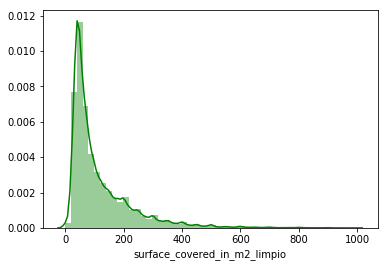

In [40]:
mask1 = data.surface_covered_in_m2_limpio < 1000
menor_mil = data.loc[mask1,:]
sns.distplot(menor_mil.surface_covered_in_m2_limpio, kde=True, color = "green")

In [41]:
# outliers
q1 = data["surface_covered_in_m2_limpio"].quantile(0.25)
print(q1)
q2 = data["surface_covered_in_m2_limpio"].quantile(0.5)
print(q2)
q3 = data["surface_covered_in_m2_limpio"].quantile(0.75)
print(q3)


iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)


outlier_sup = data["surface_covered_in_m2_limpio"] > up_threshold
outlier_inf = data["surface_covered_in_m2_limpio"] < low_threshold
outlier_mask = np.logical_or(outlier_sup, outlier_inf)

outliers = data["surface_covered_in_m2_limpio"][outlier_mask]
outliers.count()

45.0
75.0
150.0
307.5
-112.5


6681

Máscara sin outliers, vemos cuantos datos nos quedan considerando el límite superior

In [42]:
mask_sin_outliers = data.surface_covered_in_m2_limpio < 307.5
data_m2 = data.loc[mask_sin_outliers,:]
z = data_m2.groupby(["state_name", "place_name"])["surface_covered_in_m2_limpio"].count().sort_values(ascending=False)
valores = pd.DataFrame(z)
valores
print(data_m2.shape)
data_m2.property_type.value_counts()

(94632, 41)


apartment    59314
house        28051
PH            4878
store         2389
Name: property_type, dtype: int64

---

<a id="section_re"></a> 
## Expresiones Regulares

 Segun la cantidad de registros completados sobre las Series `title` `description` del dataset decidimos realizar una analisis exploratorio sobre los patrones de texto que hacen referencia a los siguientes elementos:
 - Precios de inmuebles en dolares.
 - Metros cuadrados.
 - Ambientes.
 - Amenities: cochera, balcon, parrilla, pileta/piscina, baulera, lavadero, terraza y jardin.
 
La busqueda de patrones de texto se realizo mediante el uso de expresiones regulares. En el armado de los patrones de busqueda se tuvo en consideracion el contexto donde se encontraba la cadena de caracteres a ser extraida para minimizar el numero de falsos positivos.

La extraccion y filtrado de los patrones de texto se utilizaran para completar los valores nulos de las Series:
 - `price_aprox_usd`.
 - `rooms`
 - `price_aprox_usd`

Se agregaran las siguiente Series de tipo _int64_:
 - `cochera`
 - `parilla`
 - `piscina`
 - `baulera`
 - `terraza`
 - `balcon`
 - `lavadero`
 - `jardin`

Se tomará como preferencia la columna `title` para realizar la imputación inicial sobre los valores nulos. Al resto de los valores nulos se los imputara con los resultados extraidos y procesados de la columna `description`.

Luego se aplico el uso de outliers para identificar casos extremos que pudieran indicar la existencia de valores falsos.

[volver a TOC](#section_toc)

<a id="section_re_pg"></a> 
### **Principios generales**

[volver a TOC](#section_toc)

### Patrones

**Precios inmueble en dolares**
 - `(usd|u\$d|u\$s|us\$|dolares) ?(\d{2,}(\,|\.)?\d{0,3}(\,|\.)\d{0,3}(\,|\.)?\d{0,3})(?!(.*m2|.*mc|.*metros|.*financiado))`
 - Busqueda de precios con valores entre 10000 y 99999999999.
 - Separacion de decimas con punto (.) o coma(,).
 - Debe indicarse prefijo en dolares
 - No debe contener como sufijo una denominacion a metros cuadrados.

**Metros inmueble**
 - `(\d{1,4}\,?\.?\d{0,4}) ?(m2|mc|metros|mts)`
 - VER SI AGREGAR.

**Ambientes**
 - `(?<!\-) ([1-2][0-9]?)(?= amb[^o])`
 - Entre 1 a 29 ambientes.
 - Debe tener como subfijo la cadena de caracteres "amb" o "ambientes" (no puede tener, por ejemplo "ambos") 
 - No debe ser precedido por guiones, ejemplo: 100-80 amb.

**Cochera**
 - `(?<!sin )(?<!no incluye )(?<!no posee )cochera(?! no incluye)(?! no incluida)`.
 - Busqueda de cadena de caracteres "cochera" o "cocheras".
 - La cadena de caracteres no puede estar precedida y sucedida por elementos que nieguen su existencia.

**Piscina/Pileta**
 - `piscina|pileta(?! de baño)(?! de cocina)`
 - Busqueda de cadena de caracteres "cochera" o "cocheras".
 - Se realiza la aclaracion de que la pileta no debe ser de baño o de cocina.

**Parilla**
 - `(?<!sin )(?<!no incluye )(?<!no posee )parrilla(?! no incluye)(?! no incluida)`
 - Busqueda de cadena de caracteres "parrilla" o "parrillas".
 - La cadena de caracteres no puede estar precedida y sucedida por elementos que nieguen su existencia.

**Baulera**
 - `(?<!sin )(?<!no incluye )(?<!no posee )baulera(?! no incluye)(?! no incluida)`
 - Busqueda de cadena de caracteres "baulera" o "bauleras".
 - La cadena de caracteres no puede estar precedida y sucedida por elementos que nieguen su existencia.
 
**Terraza**
 - `(?<!sin )(?<!no incluye )(?<!no posee )terraza(?! no incluye)(?! no incluida)`
 - Busqueda de cadena de caracteres "terraza" o "terrazas".
 - La cadena de caracteres no puede estar precedida y sucedida por elementos que nieguen su existencia.
 
**Balcon**
 - `(?<!sin )(?<!no incluye )(?<!no posee )balcon|balcones(?! no incluye)(?! no incluida)`
 - Busqueda de cadena de caracteres "balcon" o "balcones".
 - La cadena de caracteres no puede estar precedida y sucedida por elementos que nieguen su existencia.
 
**Jardin**
 - `(?<!sin )(?<!no incluye )(?<!no posee )jardin|jardines(?! no incluye)(?! no incluida)`
 - Busqueda de cadena de caracteres "jardin" o "jardines".
 - La cadena de caracteres no puede estar precedida y sucedida por elementos que nieguen su existencia.
 
**Lavadero**
 - `(?<!sin )(?<!no incluye )(?<!no posee )lavadero(?! no incluye)(?! no incluida)`
 - Busqueda de cadena de caracteres "lavadero"o "lavaderos".
 - La cadena de caracteres no puede estar precedida y sucedida por elementos que nieguen su existencia.

In [43]:
# Precios inmueble
precios_inmueble_pat = '(usd|u\$d|u\$s|us\$|dolares) ?(\d{2,}(\,|\.)?\d{0,3}(\,|\.)\d{0,3}(\,|\.)?\d{0,3})(?!(.*m2|.*mc|.*metros|.*financiado))'
precios_inmueble_reg = re.compile(precios_inmueble_pat, flags = re.IGNORECASE)

# Metros inmueble
metros_inmueble_pat = '(\d{1,4}\.?\d{0,4}) ?(m2|mc|metros|mts)'
metros_inmueble_reg = re.compile(metros_inmueble_pat, flags = re.IGNORECASE)

# Ambientes
amb_pat = '(?<!\-) ([1-2][0-9]?)(?= amb[^o])'
amb_reg = re.compile(amb_pat, flags = re.IGNORECASE)

# Cochera
cochera_pat = '(?<!sin )(?<!no incluye )(?<!no posee )cochera(?! no incluye)(?! no incluida)'
cochera_reg = re.compile(cochera_pat, flags = re.IGNORECASE)

# Piscina/Pileta
piscina_pat = 'piscina|pileta(?! de baño)(?! de cocina)'
piscina_reg = re.compile(piscina_pat, flags = re.IGNORECASE)

# Parilla
parrilla_pat = '(?<!sin )(?<!no incluye )(?<!no posee )parrilla(?! no incluye)(?! no incluida)'
parrilla_reg = re.compile(parrilla_pat, flags = re.IGNORECASE)

# Baulera
baulera_pat = '(?<!sin )(?<!no incluye )(?<!no posee )baulera(?! no incluye)(?! no incluida)'
baulera_reg = re.compile(baulera_pat, flags = re.IGNORECASE)

# Balcon
balcon_pat = '(?<!sin )(?<!no incluye )(?<!no posee )balcon|balcones(?! no incluye)(?! no incluida)'
balcon_reg = re.compile(balcon_pat, flags = re.IGNORECASE)

# Terraza
terraza_pat = '(?<!sin )(?<!no incluye )(?<!no posee )terraza(?! no incluye)(?! no incluida)'
terraza_reg = re.compile(terraza_pat, flags = re.IGNORECASE)

# Lavadero
lavadero_pat = '(?<!sin )(?<!no incluye )(?<!no posee )lavadero(?! no incluye)(?! no incluida)'
lavadero_reg = re.compile(lavadero_pat, flags = re.IGNORECASE)

# Jardin
jardin_pat = '(?<!sin )(?<!no incluye )(?<!no posee )jardin|jardines(?! no incluye)(?! no incluida)'
jardin_reg = re.compile(jardin_pat, flags = re.IGNORECASE)

<a id="section_regexp_pre"></a> 
### **Precios por Regex**

Depuracion de cadenas de caracteres con indicadores de precios en dolares e imputacion sobre columna `price_aprox_usd`.

[volver a TOC](#section_toc)

In [44]:
# nulos de columna precio 'antes'
data.price_aprox_usd.isnull().value_counts()

False    100810
True      20410
Name: price_aprox_usd, dtype: int64

**Columna Titulo**

In [45]:
# aplicacion de regex: conversion a tipo de dato int 
data['precios_normal_regex_titulo'] = data.title.apply(lambda x: x if x is np.NaN else precios_inmueble_reg.search(x))
#print(data.loc[data['precios_normal_regex_titulo'].notnull(), ['precios_normal_regex_titulo']].sample(400))
data['precios_normal_regex_titulo'] = data.precios_normal_regex_titulo \
    .apply(lambda x: 0 if x is None else x.group(2) \
           .replace('.','') \
           .replace(',','')) \
    .astype(int)

In [46]:
print(f'valor maximo: {data.precios_normal_regex_titulo.max()} valor minimo: {data.precios_normal_regex_titulo.min()}')

valor maximo: 123456789 valor minimo: 0


Determinacion de outliers

Quitamos valores fuera de escala (precios en dolares de alquileres, de expensas, etc).

In [47]:
minimo = 30000
maximo = 99999999

precios_normal_regex_titulo = data.precios_normal_regex_titulo.apply(lambda x: x if x > minimo and x < maximo else np.NaN)
data['precios_normal_regex_titulo'] = data.precios_normal_regex_titulo.apply(lambda x: x if x > minimo and x < maximo else np.NaN)

In [48]:
precios_normal_regex_titulo_nodup = data.drop_duplicates(subset=['precios_normal_regex_titulo'], keep='first')

In [49]:
q1 = precios_normal_regex_titulo.quantile(0.25)
q2 = precios_normal_regex_titulo.quantile(0.5)
q3 = precios_normal_regex_titulo.quantile(0.75)
q1, q2, q3

(125150.25, 220000.0, 370000.0)

In [50]:
ric = q3 - q1

outliers_sup = q3 + (ric * 1.5)
outliers_inf = q1 - (ric * 1.5)
print(outliers_sup, outliers_inf)

precios_normal_regex_titulo_out_sup = precios_normal_regex_titulo < outliers_sup
precios_normal_regex_titulo_out_inf = precios_normal_regex_titulo > outliers_inf

precios_normal_regex_titulo_mask = (precios_normal_regex_titulo_out_inf) & (precios_normal_regex_titulo_out_sup)

precios_normal_regex_titulo_mask.value_counts()

737274.625 -242124.375


False    114943
True       6277
Name: precios_normal_regex_titulo, dtype: int64

In [51]:
precios_normal_regex_titulo_filter = precios_normal_regex_titulo.loc[precios_normal_regex_titulo_mask]
print(f'Precio minimo regex titulo: {precios_normal_regex_titulo.min()}, Precio maximo regex titulo: {precios_normal_regex_titulo.max()}, Precio minimo outliers: {precios_normal_regex_titulo_filter.min()}, Precio maximo outliers:{precios_normal_regex_titulo_filter.max()}')

Precio minimo regex titulo: 30200.0, Precio maximo regex titulo: 14000000.0, Precio minimo outliers: 30200.0, Precio maximo outliers:736725.0


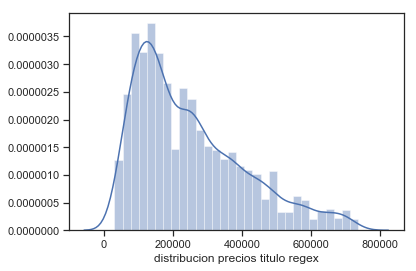

In [52]:
titulo_graph = pd.Series(precios_normal_regex_titulo_filter, name="distribucion precios titulo regex")
sns.set(style="ticks", color_codes=True)
ax = sns.distplot(titulo_graph)

In [53]:
print(data['precios_normal_regex_titulo'].apply(lambda x: type(x)).value_counts(), '\n', data['precios_normal_regex_titulo'].dtypes)

<class 'float'>    121220
Name: precios_normal_regex_titulo, dtype: int64 
 float64


In [54]:
data['precios_normal_regex_titulo'].notnull().value_counts()

False    114660
True       6560
Name: precios_normal_regex_titulo, dtype: int64

In [55]:
price_aprox_usd_null_mask = data.price_aprox_usd.isnull()

In [56]:
data.loc[price_aprox_usd_null_mask, 'price_aprox_usd'] = data.loc[price_aprox_usd_null_mask, 'precios_normal_regex_titulo']

In [57]:
data.price_aprox_usd.isnull().value_counts()

False    103189
True      18031
Name: price_aprox_usd, dtype: int64

**Columna Descripcion**

In [58]:
data['precios_normal_regex_desc'] = data.description.apply(lambda x: x if x is np.NaN else precios_inmueble_reg.search(x))
#print(data.loc[data['precios_normal_regex_desc'].notnull(), ['precios_normal_regex_desc']].sample(400))
data['precios_normal_regex_desc'] = data.precios_normal_regex_desc \
    .apply(lambda x: 0 if x is None or x is np.NaN else x.group(2) \
           .replace('.','') \
           .replace(',','')) \
    .astype(int)

Determinacion de outliers

Quitamos valores fuera de escala (precios en dolares de alquileres, de expensas, etc).

In [59]:
minimo = 30000
maximo = 99999999

precios_normal_regex_desc = data.precios_normal_regex_desc.apply(lambda x: x if x > minimo and x < maximo else np.NaN)
data['precios_normal_regex_desc'] = data.precios_normal_regex_desc.apply(lambda x: x if x > minimo and x < maximo else np.NaN)

In [60]:
precios_normal_regex_desc_nodup = data.drop_duplicates(subset=['precios_normal_regex_desc'], keep='first')

In [61]:
q1 = precios_normal_regex_desc.quantile(0.25)
q2 = precios_normal_regex_desc.quantile(0.5)
q3 = precios_normal_regex_desc.quantile(0.75)
q1, q2, q3

(69900.0, 110000.0, 175000.0)

In [62]:
ric = q3 - q1

outliers_sup = q3 + (ric * 1.5)
outliers_inf = q1 - (ric * 1.5)
print(outliers_sup, outliers_inf)

precios_normal_regex_desc_out_sup = precios_normal_regex_desc < outliers_sup
precios_normal_regex_desc_out_inf = precios_normal_regex_desc > outliers_inf

precios_normal_regex_desc_mask = (precios_normal_regex_desc_out_inf) & (precios_normal_regex_desc_out_sup)

precios_normal_regex_desc_mask.value_counts()

332650.0 -87750.0


False    116695
True       4525
Name: precios_normal_regex_desc, dtype: int64

In [63]:
precios_normal_regex_desc_filter = precios_normal_regex_desc.loc[precios_normal_regex_desc_mask]
print(f'Precio minimo regex descripcion: {precios_normal_regex_desc.min()}, Precio maximo regex descripcion: {precios_normal_regex_desc.max()}, Precio minimo outliers: {precios_normal_regex_desc_filter.min()}, Precio maximo outliers:{precios_normal_regex_desc_filter.max()}')

Precio minimo regex descripcion: 30051.0, Precio maximo regex descripcion: 75000223.0, Precio minimo outliers: 30051.0, Precio maximo outliers:331000.0


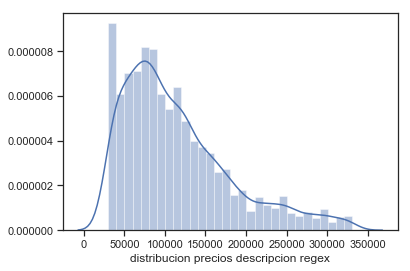

In [64]:
desc_graph = pd.Series(precios_normal_regex_desc_filter, name="distribucion precios descripcion regex")
sns.set(style="ticks", color_codes=True)
ax = sns.distplot(desc_graph)

In [65]:
data['precios_normal_regex_desc'].notnull().value_counts()

False    116188
True       5032
Name: precios_normal_regex_desc, dtype: int64

In [66]:
print(data['precios_normal_regex_desc'].apply(lambda x: type(x)).value_counts(), '\n', data['precios_normal_regex_desc'].dtypes)

<class 'float'>    121220
Name: precios_normal_regex_desc, dtype: int64 
 float64


In [67]:
# creo nuevamente la mascara actualizada con los nuevos valores nulos
price_aprox_usd_null_mask = data.price_aprox_usd.isnull()

In [68]:
data.loc[price_aprox_usd_null_mask, 'price_aprox_usd'] = data.loc[price_aprox_usd_null_mask, 'precios_normal_regex_desc']

In [69]:
data.price_aprox_usd.isnull().value_counts()

False    103366
True      17854
Name: price_aprox_usd, dtype: int64

Limpieza

In [70]:
data.drop(['precios_normal_regex_titulo', 'precios_normal_regex_desc'], axis=1, inplace=True)

<a id="section_regexp_amb"></a> 
### **Ambientes por Regex**

Depuracion de cadenas de caracteres con indicadores de cantidad de ambientes e imputacion sobre columna `rooms`.

[volver a TOC](#section_toc)

In [71]:
data.rooms.apply(lambda x: type(x)).value_counts()

<class 'float'>    121220
Name: rooms, dtype: int64

In [72]:
data.rooms.isnull().value_counts()

True     73830
False    47390
Name: rooms, dtype: int64

**Columna Titulo**

In [73]:
data['rooms_regex_titulo'] = data.title.apply(lambda x: x if x is np.NaN else amb_reg.search(x))
data['rooms_regex_titulo'] = data.rooms_regex_titulo.apply(lambda x: x if x is None else x.group(1))
data['rooms_regex_titulo'] = data.rooms_regex_titulo.apply(lambda x: np.NaN if x is None else float(x))

In [74]:
data.rooms_regex_titulo.isnull().value_counts()

True     114860
False      6360
Name: rooms_regex_titulo, dtype: int64

In [75]:
data.rooms_regex_titulo.value_counts()

2.0     5333
1.0     1019
11.0       3
10.0       2
15.0       1
14.0       1
12.0       1
Name: rooms_regex_titulo, dtype: int64

In [76]:
data_rooms_null_mask = data.rooms.isnull()

In [77]:
data.loc[data_rooms_null_mask, 'rooms'] = data.loc[data_rooms_null_mask, 'rooms_regex_titulo']
data.rooms.isnull().value_counts()

True     71455
False    49765
Name: rooms, dtype: int64

**Columna Descripcion**

In [78]:
data['rooms_regex_desc'] = data.description.apply(lambda x: x if x is np.NaN else amb_reg.search(x))
data['rooms_regex_desc'] = data.rooms_regex_desc.apply(lambda x: x if x is np.NaN or x is None else x.group(1))
data['rooms_regex_desc'] = data.rooms_regex_desc.apply(lambda x: np.NaN if x is None else float(x))

In [79]:
data.rooms_regex_desc.isnull().value_counts()

True     106492
False     14728
Name: rooms_regex_desc, dtype: int64

In [80]:
data.rooms_regex_desc.value_counts()

2.0     12482
1.0      2210
10.0       13
11.0       12
18.0        3
14.0        3
12.0        2
17.0        1
25.0        1
22.0        1
Name: rooms_regex_desc, dtype: int64

In [81]:
data_rooms_null_mask = data.rooms.isnull()

In [82]:
data.loc[data_rooms_null_mask, 'rooms'] = data.loc[data_rooms_null_mask, 'rooms_regex_desc']
data.rooms.isnull().value_counts()

True     65802
False    55418
Name: rooms, dtype: int64

Limpieza

In [83]:
data.drop(['rooms_regex_titulo', 'rooms_regex_desc'], axis=1, inplace=True)

<a id="section_regexp_m2"></a> 
### **Metros cuadrados por Regex**

Imputacion mediante expresiones regulares superficies de inmuebles.

[volver a TOC](#section_toc)

Titulo

In [84]:
# inmuebles con menos de 25 mt2
menor_25 = data_m2.surface_covered_in_m2_limpio < 25
mask1 = data_m2.loc[menor_25,"surface_covered_in_m2_limpio"]
print(mask1.count())
data_menor_25 = data_m2.loc[menor_25,:]
data_menor_25.shape

a = data_menor_25.title.apply(lambda x: metros_inmueble_reg.search(x))
a.value_counts
mt2_match = a.apply(lambda x: x if x is None else x.group(1))
data["menores_25"]= mt2_match

2554


In [85]:
# actualizamos los datos resultantes en la columna limpia
m = data.menores_25.notnull()
data.loc[m, "surface_covered_in_m2_limpio"] = data.loc[m, "menores_25"]
data["surface_covered_in_m2_limpio"] = data["surface_covered_in_m2_limpio"].astype(float)

In [86]:
# registros a eliminar: inmuebles menores de 10 mt2
menor_10 = data.surface_covered_in_m2_limpio < 10
mask10 = data.loc[menor_10,"surface_covered_in_m2_limpio"]
print(mask10.count())
data_menor_10 = data.loc[menor_10,:]
data_menor_10

434


,Id_caso,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,place_name_new,calidad_dato,geonames_id_new,Valor_dolar,price_usd_per_m2_new,price_per_m2_new,surface_total_in_m2_limpio,surface_covered_in_m2_limpio,diferencia_mt2,menores_25
349,349,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.430822,-64.1902624",-31.430822,...,Córdoba,False,3860259.0,17.64,NaN,1236000.0,NaN,1.0,NaN,None
840,840,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.586109,-58.3875047",-34.586109,...,Recoleta,False,3429595.0,17.64,4487.5,44875.0,40.0,4.0,36.0,None
920,920,sell,house,Esteban Echeverría,|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Echeverría|,Argentina,Bs.As. G.B.A. Zona Sur,3434003.0,"-34.8487278,-58.4823123",-34.848728,...,Esteban Echeverría,True,3434003.0,17.64,NaN,16250.0,NaN,4.0,NaN,None
1845,1845,sell,apartment,Morón,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|,Argentina,Bs.As. G.B.A. Zona Oeste,3430544.0,"-34.64982986,-58.64066315",-34.649830,...,Morón,True,3430544.0,0.00,NaN,NaN,NaN,1.0,NaN,None
2265,2265,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.40352631,-58.64899826",-34.403526,...,Nordelta,False,19005917.0,0.00,NaN,NaN,NaN,1.0,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116488,116488,sell,house,Misiones,|Argentina|Misiones|,Argentina,Misiones,3430657.0,"-27.427012,-55.9463932",-27.427012,...,Misiones,False,3430657.0,17.64,NaN,60000.0,NaN,2.0,NaN,None
116947,116947,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4244888454,-58.6597014121",-34.424489,...,Nordelta,False,19005917.0,17.64,NaN,215000.0,NaN,1.0,NaN,None
116956,116956,sell,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,3429979.0,"-34.4330131844,-58.8187559433",-34.433013,...,Pilar,True,3429979.0,17.64,NaN,530000.0,NaN,1.0,NaN,None
119165,119165,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,NaN,NaN,...,Palermo,False,3430234.0,0.00,NaN,NaN,123.0,1.0,122.0,None


Descripcion

In [87]:
# inmuebles con menos de 25 mt2
menor_25 = data_m2.surface_covered_in_m2_limpio < 25
mask1 = data_m2.loc[menor_25,"surface_covered_in_m2_limpio"]
print(mask1.count())
data_menor_25 = data_m2.loc[menor_25,:]
data_menor_25.shape

a = data_menor_25.description.apply(lambda x: metros_inmueble_reg.search(x))
a.value_counts
mt2_match = a.apply(lambda x: x if x is None else x.group(1))
data["menores_25"]= mt2_match

2554


In [88]:
# registros a eliminar: inmuebles menores de 10 mt2
menor_10 = data.surface_covered_in_m2_limpio < 10
mask10 = data.loc[menor_10,"surface_covered_in_m2_limpio"]
print(mask10.count())
data_menor_10 = data.loc[menor_10,:]
data_menor_10

434


,Id_caso,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,place_name_new,calidad_dato,geonames_id_new,Valor_dolar,price_usd_per_m2_new,price_per_m2_new,surface_total_in_m2_limpio,surface_covered_in_m2_limpio,diferencia_mt2,menores_25
349,349,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.430822,-64.1902624",-31.430822,...,Córdoba,False,3860259.0,17.64,NaN,1236000.0,NaN,1.0,NaN,None
840,840,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.586109,-58.3875047",-34.586109,...,Recoleta,False,3429595.0,17.64,4487.5,44875.0,40.0,4.0,36.0,None
920,920,sell,house,Esteban Echeverría,|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Echeverría|,Argentina,Bs.As. G.B.A. Zona Sur,3434003.0,"-34.8487278,-58.4823123",-34.848728,...,Esteban Echeverría,True,3434003.0,17.64,NaN,16250.0,NaN,4.0,NaN,None
1845,1845,sell,apartment,Morón,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|,Argentina,Bs.As. G.B.A. Zona Oeste,3430544.0,"-34.64982986,-58.64066315",-34.649830,...,Morón,True,3430544.0,0.00,NaN,NaN,NaN,1.0,NaN,None
2265,2265,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.40352631,-58.64899826",-34.403526,...,Nordelta,False,19005917.0,0.00,NaN,NaN,NaN,1.0,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116488,116488,sell,house,Misiones,|Argentina|Misiones|,Argentina,Misiones,3430657.0,"-27.427012,-55.9463932",-27.427012,...,Misiones,False,3430657.0,17.64,NaN,60000.0,NaN,2.0,NaN,None
116947,116947,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4244888454,-58.6597014121",-34.424489,...,Nordelta,False,19005917.0,17.64,NaN,215000.0,NaN,1.0,NaN,None
116956,116956,sell,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,3429979.0,"-34.4330131844,-58.8187559433",-34.433013,...,Pilar,True,3429979.0,17.64,NaN,530000.0,NaN,1.0,NaN,None
119165,119165,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,NaN,NaN,...,Palermo,False,3430234.0,0.00,NaN,NaN,123.0,1.0,122.0,200


<a id="section_regexp_ame"></a> 
### **Amenities por Regex**

Depuracion de cadenas de caracteres con indicadores de caracteristicas adicionales sobre inmuebles.

[volver a TOC](#section_toc)

#### **Cocheras**

Columna Titulo

In [89]:
data['cochera_regex_titulo'] = data.title.apply(lambda x: x if x is np.NaN else cochera_reg.search(x))
data['cochera_regex_titulo'] = data.cochera_regex_titulo.apply(lambda x: x if x is None else x.group())

In [90]:
cochera_regex_titulo_notnull_mask = data['cochera_regex_titulo'].notnull()
data.loc[cochera_regex_titulo_notnull_mask, 'cochera_regex_titulo'] = 1
cochera_regex_titulo_null_mask = data['cochera_regex_titulo'].isnull()
data.loc[cochera_regex_titulo_null_mask, 'cochera_regex_titulo'] = np.NaN

data['cochera_regex_titulo'].isnull().value_counts()

True     115235
False      5985
Name: cochera_regex_titulo, dtype: int64

Columna Descripcion

In [91]:
data['cochera_regex_desc'] = data.description.apply(lambda x: x if x is np.NaN else cochera_reg.search(x))
data['cochera_regex_desc'] = data.cochera_regex_desc.apply(lambda x: x if x is None or x is np.NaN else x.group())

In [92]:
cochera_regex_desc_notnull_mask = data['cochera_regex_desc'].notnull()
data.loc[cochera_regex_desc_notnull_mask, 'cochera_regex_desc'] = 1
cochera_regex_desc_null_mask = data['cochera_regex_desc'].isnull()
data.loc[cochera_regex_desc_null_mask, 'cochera_regex_desc'] = np.NaN

data['cochera_regex_desc'].isnull().value_counts()

True     79062
False    42158
Name: cochera_regex_desc, dtype: int64

Nueva columna cochera

In [93]:
data['cochera'] = data['cochera_regex_titulo']
data.loc[data['cochera_regex_titulo'].isnull(), 'cochera'] = data.loc[data['cochera_regex_titulo'].isnull(), 'cochera_regex_desc']
data['cochera'].isnull().value_counts()

True     78075
False    43145
Name: cochera, dtype: int64

Limpieza

In [94]:
data.drop(['cochera_regex_titulo', 'cochera_regex_desc'], axis=1, inplace=True)

#### **Piscinas**

Columna Titulo

In [95]:
data['piscina_regex_titulo'] = data.title.apply(lambda x: x if x is np.NaN else piscina_reg.search(x))
data['piscina_regex_titulo'] = data.piscina_regex_titulo.apply(lambda x: x if x is None else x.group())

In [96]:
piscina_regex_titulo_notnull_mask = data['piscina_regex_titulo'].notnull()
data.loc[piscina_regex_titulo_notnull_mask, 'piscina_regex_titulo'] = 1
piscina_regex_titulo_null_mask = data['piscina_regex_titulo'].isnull()
data.loc[piscina_regex_titulo_null_mask, 'piscina_regex_titulo'] = np.NaN

data['piscina_regex_titulo'].isnull().value_counts()

True     119616
False      1604
Name: piscina_regex_titulo, dtype: int64

Columna Descripcion

In [97]:
data['piscina_regex_desc'] = data.description.apply(lambda x: x if x is np.NaN else piscina_reg.search(x))
data['piscina_regex_desc'] = data.piscina_regex_desc.apply(lambda x: x if x is None or x is np.NaN else x.group())

In [98]:
piscina_regex_desc_notnull_mask = data['piscina_regex_desc'].notnull()
data.loc[piscina_regex_desc_notnull_mask, 'piscina_regex_desc'] = 1
piscina_regex_desc_null_mask = data['piscina_regex_desc'].isnull()
data.loc[piscina_regex_desc_null_mask, 'piscina_regex_desc'] = np.NaN

data['piscina_regex_desc'].isnull().value_counts()

True     88487
False    32733
Name: piscina_regex_desc, dtype: int64

Nueva Columna Piscina

In [99]:
data['piscina'] = data['piscina_regex_titulo']
data.loc[data['piscina_regex_titulo'].isnull(), 'piscina'] = data.loc[data['piscina_regex_titulo'].isnull(), 'piscina_regex_desc']
data['piscina'].isnull().value_counts()

True     88398
False    32822
Name: piscina, dtype: int64

Limpieza

In [100]:
data.drop(['piscina_regex_titulo', 'piscina_regex_desc'], axis=1, inplace=True)

#### **Parilla**

Columna Titulo

In [101]:
data['parrilla_regex_titulo'] = data.title.apply(lambda x: x if x is np.NaN else parrilla_reg.search(x))
data['parrilla_regex_titulo'] = data.parrilla_regex_titulo.apply(lambda x: x if x is None else x.group())

In [102]:
parrilla_regex_titulo_notnull_mask = data['parrilla_regex_titulo'].notnull()
data.loc[parrilla_regex_titulo_notnull_mask, 'parrilla_regex_titulo'] = 1
parrilla_regex_titulo_null_mask = data['parrilla_regex_titulo'].isnull()
data.loc[parrilla_regex_titulo_null_mask, 'parrilla_regex_titulo'] = np.NaN

data['parrilla_regex_titulo'].isnull().value_counts()

True     120548
False       672
Name: parrilla_regex_titulo, dtype: int64

Columna Descripcion

In [103]:
data['parrilla_regex_desc'] = data.description.apply(lambda x: x if x is np.NaN else parrilla_reg.search(x))
data['parrilla_regex_desc'] = data.parrilla_regex_desc.apply(lambda x: x if x is None or x is np.NaN else x.group())

In [104]:
parrilla_regex_desc_notnull_mask = data['parrilla_regex_desc'].notnull()
data.loc[parrilla_regex_desc_notnull_mask, 'parrilla_regex_desc'] = 1
parrilla_regex_desc_null_mask = data['parrilla_regex_desc'].isnull()
data.loc[parrilla_regex_desc_null_mask, 'parrilla_regex_desc'] = np.NaN

data['parrilla_regex_desc'].isnull().value_counts()

True     87187
False    34033
Name: parrilla_regex_desc, dtype: int64

Nueva columna Parrilla

In [105]:
data['parrilla'] = data['parrilla_regex_titulo']
data.loc[data['parrilla_regex_titulo'].isnull(), 'parrilla'] = data.loc[data['parrilla_regex_titulo'].isnull(), 'parrilla_regex_desc']
data['parrilla'].isnull().value_counts()

True     87129
False    34091
Name: parrilla, dtype: int64

Limpieza

In [106]:
data.drop(['parrilla_regex_titulo', 'parrilla_regex_desc'], axis=1, inplace=True)

**Baulera**

Columna Titulo

In [107]:
data['baulera_regex_titulo'] = data.title.apply(lambda x: x if x is np.NaN else baulera_reg.search(x))
data['baulera_regex_titulo'] = data.baulera_regex_titulo.apply(lambda x: x if x is None else x.group())

In [108]:
baulera_regex_titulo_notnull_mask = data['baulera_regex_titulo'].notnull()
data.loc[baulera_regex_titulo_notnull_mask, 'baulera_regex_titulo'] = 1
baulera_regex_titulo_null_mask = data['baulera_regex_titulo'].isnull()
data.loc[baulera_regex_titulo_null_mask, 'baulera_regex_titulo'] = np.NaN

data['baulera_regex_titulo'].isnull().value_counts()

True     120693
False       527
Name: baulera_regex_titulo, dtype: int64

Columna Descripcion

In [109]:
data['baulera_regex_desc'] = data.description.apply(lambda x: x if x is np.NaN else baulera_reg.search(x))
data['baulera_regex_desc'] = data.baulera_regex_desc.apply(lambda x: x if x is None or x is np.NaN else x.group())

In [110]:
baulera_regex_desc_notnull_mask = data['baulera_regex_desc'].notnull()
data.loc[baulera_regex_desc_notnull_mask, 'baulera_regex_desc'] = 1
baulera_regex_desc_null_mask = data['baulera_regex_desc'].isnull()
data.loc[baulera_regex_desc_null_mask, 'baulera_regex_desc'] = np.NaN

data['baulera_regex_desc'].isnull().value_counts()

True     110435
False     10785
Name: baulera_regex_desc, dtype: int64

Nueva columna Baulera

In [111]:
data['baulera'] = data['baulera_regex_titulo']
data.loc[data['baulera_regex_titulo'].isnull(), 'baulera'] = data.loc[data['baulera_regex_titulo'].isnull(), 'baulera_regex_desc']
data['baulera'].isnull().value_counts()

True     110378
False     10842
Name: baulera, dtype: int64

Limpieza

In [112]:
data.drop(['baulera_regex_titulo', 'baulera_regex_desc'], axis=1, inplace=True)

**Balcon**

Columna Titulo

In [113]:
data['balcon_regex_titulo'] = data.title.apply(lambda x: x if x is np.NaN else balcon_reg.search(x))
data['balcon_regex_titulo'] = data.balcon_regex_titulo.apply(lambda x: x if x is None else x.group())

In [114]:
balcon_regex_titulo_notnull_mask = data['balcon_regex_titulo'].notnull()
data.loc[balcon_regex_titulo_notnull_mask, 'balcon_regex_titulo'] = 1
balcon_regex_titulo_null_mask = data['balcon_regex_titulo'].isnull()
data.loc[balcon_regex_titulo_null_mask, 'balcon_regex_titulo'] = np.NaN

data['balcon_regex_titulo'].isnull().value_counts()

True     119569
False      1651
Name: balcon_regex_titulo, dtype: int64

Columna Descripcion

In [115]:
data['balcon_regex_desc'] = data.description.apply(lambda x: x if x is np.NaN else balcon_reg.search(x))
data['balcon_regex_desc'] = data.balcon_regex_desc.apply(lambda x: x if x is None or x is np.NaN else x.group())

In [116]:
balcon_regex_desc_notnull_mask = data['balcon_regex_desc'].notnull()
data.loc[baulera_regex_desc_notnull_mask, 'balcon_regex_desc'] = 1
balcon_regex_desc_null_mask = data['balcon_regex_desc'].isnull()
data.loc[balcon_regex_desc_null_mask, 'balcon_regex_desc'] = np.NaN

data['balcon_regex_desc'].isnull().value_counts()

True     96351
False    24869
Name: balcon_regex_desc, dtype: int64

Nueva columna Balcon

In [117]:
data['balcon'] = data['balcon_regex_titulo']
data.loc[data['balcon_regex_titulo'].isnull(), 'balcon'] = data.loc[data['balcon_regex_titulo'].isnull(), 'balcon_regex_desc']
data['balcon'].isnull().value_counts()

True     95752
False    25468
Name: balcon, dtype: int64

Limpieza

In [118]:
data.drop(['balcon_regex_titulo', 'balcon_regex_desc'], axis=1, inplace=True)

**Terraza**

Columna Titulo

In [119]:
data['terraza_regex_titulo'] = data.title.apply(lambda x: x if x is np.NaN else terraza_reg.search(x))
data['terraza_regex_titulo'] = data.terraza_regex_titulo.apply(lambda x: x if x is None else x.group())

In [120]:
terraza_regex_titulo_notnull_mask = data['terraza_regex_titulo'].notnull()
data.loc[terraza_regex_titulo_notnull_mask, 'terraza_regex_titulo'] = 1
terraza_regex_titulo_null_mask = data['terraza_regex_titulo'].isnull()
data.loc[terraza_regex_titulo_null_mask, 'terraza_regex_titulo'] = np.NaN

data['terraza_regex_titulo'].isnull().value_counts()

True     119144
False      2076
Name: terraza_regex_titulo, dtype: int64

Columna Descripcion

In [121]:
data['terraza_regex_desc'] = data.description.apply(lambda x: x if x is np.NaN else terraza_reg.search(x))
data['terraza_regex_desc'] = data.terraza_regex_desc.apply(lambda x: x if x is None or x is np.NaN else x.group())

In [122]:
terraza_regex_desc_notnull_mask = data['terraza_regex_desc'].notnull()
data.loc[terraza_regex_desc_notnull_mask, 'terraza_regex_desc'] = 1
terraza_regex_desc_null_mask = data['terraza_regex_desc'].isnull()
data.loc[terraza_regex_desc_null_mask, 'terraza_regex_desc'] = np.NaN

data['terraza_regex_desc'].isnull().value_counts()

True     93717
False    27503
Name: terraza_regex_desc, dtype: int64

Nueva columna Terraza

In [123]:
data['terraza'] = data['terraza_regex_titulo']
data.loc[data['terraza_regex_titulo'].isnull(), 'terraza'] = data.loc[data['terraza_regex_titulo'].isnull(), 'terraza_regex_desc']
data['terraza'].isnull().value_counts()

True     93525
False    27695
Name: terraza, dtype: int64

Limpieza

In [124]:
data.drop(['terraza_regex_titulo', 'terraza_regex_desc'], axis=1, inplace=True)

**Jardin**

Columna Titulo

In [125]:
data['jardin_regex_titulo'] = data.title.apply(lambda x: x if x is np.NaN else jardin_reg.search(x))
data['jardin_regex_titulo'] = data.jardin_regex_titulo.apply(lambda x: x if x is None else x.group())

In [126]:
jardin_regex_titulo_notnull_mask = data['jardin_regex_titulo'].notnull()
data.loc[jardin_regex_titulo_notnull_mask, 'jardin_regex_titulo'] = 1
jardin_regex_titulo_null_mask = data['jardin_regex_titulo'].isnull()
data.loc[jardin_regex_titulo_null_mask, 'jardin_regex_titulo'] = np.NaN

data['jardin_regex_titulo'].isnull().value_counts()

True     120510
False       710
Name: jardin_regex_titulo, dtype: int64

Columna Descripcion

In [127]:
data['jardin_regex_desc'] = data.description.apply(lambda x: x if x is np.NaN else jardin_reg.search(x))
data['jardin_regex_desc'] = data.jardin_regex_desc.apply(lambda x: x if x is None or x is np.NaN else x.group())

In [128]:
jardin_regex_desc_notnull_mask = data['jardin_regex_desc'].notnull()
data.loc[jardin_regex_desc_notnull_mask, 'jardin_regex_desc'] = 1
jardin_regex_desc_null_mask = data['jardin_regex_desc'].isnull()
data.loc[jardin_regex_desc_null_mask, 'jardin_regex_desc'] = np.NaN

data['jardin_regex_desc'].isnull().value_counts()

True     113437
False      7783
Name: jardin_regex_desc, dtype: int64

Nueva columna jardin

In [129]:
data['jardin'] = data['jardin_regex_titulo']
data.loc[data['jardin_regex_titulo'].isnull(), 'jardin'] = data.loc[data['jardin_regex_titulo'].isnull(), 'jardin_regex_desc']
data['jardin'].isnull().value_counts()

True     113062
False      8158
Name: jardin, dtype: int64

Limpieza

In [130]:
data.drop(['jardin_regex_titulo', 'jardin_regex_desc'], axis=1, inplace=True)

**Lavadero**

Columna Titulo

In [131]:
data['lavadero_regex_titulo'] = data.title.apply(lambda x: x if x is np.NaN else lavadero_reg.search(x))
data['lavadero_regex_titulo'] = data.lavadero_regex_titulo.apply(lambda x: x if x is None else x.group())

In [132]:
lavadero_regex_titulo_notnull_mask = data['lavadero_regex_titulo'].notnull()
data.loc[lavadero_regex_titulo_notnull_mask, 'lavadero_regex_titulo'] = 1
lavadero_regex_titulo_null_mask = data['lavadero_regex_titulo'].isnull()
data.loc[lavadero_regex_titulo_null_mask, 'lavadero_regex_titulo'] = np.NaN

data['lavadero_regex_titulo'].isnull().value_counts()

True     121044
False       176
Name: lavadero_regex_titulo, dtype: int64

Columna Descripcion

In [133]:
data['lavadero_regex_desc'] = data.description.apply(lambda x: x if x is np.NaN else lavadero_reg.search(x))
data['lavadero_regex_desc'] = data.lavadero_regex_desc.apply(lambda x: x if x is None or x is np.NaN else x.group())

In [134]:
lavadero_regex_desc_notnull_mask = data['lavadero_regex_desc'].notnull()
data.loc[lavadero_regex_desc_notnull_mask, 'lavadero_regex_desc'] = 1
lavadero_regex_desc_null_mask = data['lavadero_regex_desc'].isnull()
data.loc[lavadero_regex_desc_null_mask, 'lavadero_regex_desc'] = np.NaN

data['lavadero_regex_desc'].isnull().value_counts()

True     82891
False    38329
Name: lavadero_regex_desc, dtype: int64

Nueva columna lavadero

In [135]:
data['lavadero'] = data['lavadero_regex_titulo']
data.loc[data['lavadero_regex_titulo'].isnull(), 'lavadero'] = data.loc[data['lavadero_regex_titulo'].isnull(), 'lavadero_regex_desc']
data['lavadero'].isnull().value_counts()

True     82876
False    38344
Name: lavadero, dtype: int64

Limpieza

In [136]:
data.drop(['lavadero_regex_titulo', 'lavadero_regex_desc'], axis=1, inplace=True)

---
<a id="section_drd"></a> 
## Proceso de borrado de registros duplicados

[volver a TOC](#section_toc)

Luego del analisis de cada uno de los datos, llegamos a la conclusion de ejecutar el borrado de los datos duplicados sobre las variables:
* property_type
* geonames_id_new
* lat-lon
* price_aprox_usd
* price_per_m2_new
* description
* title

Teniendo en cuenta como afecta al proceso la cantidad de nulos de cada variable

In [137]:
print ('Proceso de borrado de duplicados')
print ('--------------------------------')

print('Cantidad de registros con duplicados: ' + str(len(data)))

# analizando las varibles disponibles decidimos validar la existencia de duplicados por:
# property_type:    no existen nulos
# geonames_id_new:  no existen nulos
# lat-lon:          existen nulos
# price_aprox_usd:  existen nulos
# price_per_m2_new: existen nulos
# description:      no existen nulos
# title:            no existen nulos

print ('Cantidad de registros duplicados: ' + str(data.duplicated(subset=[\
                                                                                  "property_type",\
                                                                                  "geonames_id_new",\
                                                                                  "lat-lon",\
                                                                                  "price_aprox_usd",\
                                                                                  "price_per_m2_new",\
                                                                                  "description",\
                                                                                  "title"\
                                                                                 ], keep="last").sum())\
      )

data.drop_duplicates(subset=[\
                                     "property_type",\
                                     "geonames_id_new",\
                                     "lat-lon",\
                                     "price_aprox_usd",\
                                     "price_per_m2_new",\
                                     "description",\
                                     "title"\
                                    ], keep="last", inplace=True)

print('Cantidad de registros sin duplicados: ' + str(len(data)))

Proceso de borrado de duplicados
--------------------------------
Cantidad de registros con duplicados: 121220
Cantidad de registros duplicados: 6171
Cantidad de registros sin duplicados: 115049


---
<a id="section_drii"></a> 
## Proceso de borrado de registros sin información completa

De acuerdo al trabajo de limpieza que generamos, vemos que existen casuísticas que debemos tener en cuenta y que debemos descartar

[volver a TOC](#section_top)

Planteamos tres escenarios que nos permiten definifir los conjuntos de datos que pueden ser borrados:

In [138]:
print ('Cantidad de registros original: ' + str(len(data)))

Cantidad de registros original: 115049


1. `price_aprox_usd es null` & `surface_covered_in_m2 es null` & `price_per_m2_new is null`

In [139]:
maskf_price_aprox_usd = data.price_aprox_usd.isnull()
maskf_surface_covered_in_m2 = data.surface_covered_in_m2.isnull()
maskf_price_per_m2_new = data.price_per_m2_new.isnull()
print (len(data.loc[maskf_price_aprox_usd&maskf_surface_covered_in_m2&maskf_price_per_m2_new]))
data.drop(data[maskf_price_aprox_usd&maskf_surface_covered_in_m2&maskf_price_per_m2_new].index, inplace=True)

5589


2. `calidad_dato = True` & `lat-lon` es null

In [140]:
maskf_calidad_dato = data.calidad_dato == True
maskf_lat_lon = data["lat-lon"].isnull()
print (len(data.loc[maskf_calidad_dato&maskf_lat_lon]))
data.drop(data[maskf_calidad_dato&maskf_lat_lon].index, inplace=True)

7043


3. aquellas regiones con una cantidad de casos muy chica

In [141]:
list_state_name = ['Tierra Del Fuego','Catamarca','Jujuy','Santa Cruz','La Rioja','Santiago Del Estero']
mask_state_name = [x in list_state_name for x in data.state_name]
print (len(data.loc[mask_state_name]))
data.drop(data[mask_state_name].index, inplace=True)
print ('-----------------------------------------------------------------------------------------------------')
print ('Eliminamos los registros:')
#data.drop(data[maskf_price_aprox_usd&maskf_surface_covered_in_m2&maskf_price_per_m2_new].index, inplace=True)
#data.drop(data[maskf_calidad_dato&maskf_lat_lon].index, inplace=True)
#data.drop(data[mask_state_name].index, inplace=True)
print ('-----------------------------------------------------------------------------------------------------')
print ('Validamos el resultado:')
print ('Cantidad de registros final: ' + str(len(data)))


94
-----------------------------------------------------------------------------------------------------
Eliminamos los registros:
-----------------------------------------------------------------------------------------------------
Validamos el resultado:
Cantidad de registros final: 102323


## Estado final dataframe

In [144]:
# borro columnas: 0, geonames_id (geonames_id_new es la corregida), surface_covered_in_m2, surface_total_in_m2, place_name, price_per_m2, price_usd_per_m2, image_thumbnail, operation, properati_url, menores_25, diferencia_mt2
data.drop([0, 'geonames_id', 'surface_covered_in_m2', 'surface_total_in_m2', 'place_name', 'price_per_m2', 'price_usd_per_m2', 'image_thumbnail', 'operation', 'properati_url', 'menores_25', 'diferencia_mt2', 'calidad_dato', 'Valor_dolar'], axis=1, inplace=True)
data = data.rename({'Unnamed: 0': 'Id_caso',
                   'geonames_id_new': 'geonames_id',
                   'surface_covered_in_m2_new': 'surface_covered_in_m2',
                   'surface_total_in_m2_new': 'surface_total_in_m2',
                   'place_name_new': 'place_name',
                   'price_per_m2_new': 'price_per_m2',
                   'price_usd_per_m2_new': 'price_usd_per_m2',
                   'surface_covered_in_m2_limpio': 'surface_covered_in_m2',
                   'surface_total_in_m2_limpio': 'surface_total_in_m2'
                   }, axis=1)

In [145]:
display(data.head(3))
display(data.shape)

,Id_caso,property_type,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,surface_total_in_m2,surface_covered_in_m2,cochera,piscina,parrilla,baulera,balcon,terraza,jardin,lavadero
0,0,PH,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,55.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,apartment,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,apartment,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


(102417, 36)

In [146]:
data.columns

Index(['Id_caso', 'property_type', 'place_with_parent_names', 'country_name',
       'state_name', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'floor', 'rooms',
       'expenses', 'description', 'title', 'Pais', 'Zona', 'Partido_barrio',
       'Localidad', 'Obs_localidad', 'place_name', 'geonames_id',
       'price_usd_per_m2', 'price_per_m2', 'surface_total_in_m2',
       'surface_covered_in_m2', 'cochera', 'piscina', 'parrilla', 'baulera',
       'balcon', 'terraza', 'jardin', 'lavadero'],
      dtype='object')

--- 
## Visualizaciones basicas

<a id="section_intro"></a> 
### Venta departamentos CABA

 Distribucion por rango de precios en dolares sobre la cantidad de departamentos ofertados en CABA.
 
[volver a TOC](#section_vis_1)

In [147]:
precios_bins_label = ['menos de 50.000',
                           '50.000-90.000',
                           '90.000-130.000',
                           '130.000-170.000',
                           '170.000-210.000',
                           '210.000-250.000',
                           '250.000-290.000',
                           '290.000-330.000', 
                           '330.000-370.000', 
                           '370.000-410.000', 
                           '410.000-450.000',
                           '450.000-490.000',
                           'mas de 490.000']
precios_bins = [0, 50000, 90000, 130000, 170000, 210000, 250000, 290000, 330000, 370000, 410000, 450000, 490000, 100000000]

In [148]:
barrios_caba_lst = list(data.loc[data.state_name == 'Capital Federal','place_name'].unique())
mask_barrios_caba = data.loc[:,'place_name'].apply(lambda x: x in barrios_caba_lst)

In [149]:
barrios_caba_zonas = data.loc[(data['state_name'] == 'Capital Federal') & mask_barrios_caba & (data['property_type'] == 'apartment'), :]

print(barrios_caba_zonas.shape[0], data.loc[data.state_name == 'Capital Federal','place_name'].shape[0] )

24713 29380


In [150]:
precios_caba_cat = pd.cut(barrios_caba_zonas.price_aprox_usd, precios_bins, labels=precios_bins_label)

In [151]:
precios_caba_cat.value_counts().sum()

23415

In [152]:
precios_caba_cat_porc = round((precios_caba_cat.value_counts() / precios_caba_cat.value_counts().sum())*100,2)

In [153]:
precios_caba_cat_porc

90.000-130.000     24.54
50.000-90.000      17.80
130.000-170.000    15.51
mas de 490.000     10.16
170.000-210.000     9.44
210.000-250.000     6.57
250.000-290.000     4.06
290.000-330.000     2.92
330.000-370.000     2.62
370.000-410.000     1.96
410.000-450.000     1.79
menos de 50.000     1.50
450.000-490.000     1.15
Name: price_aprox_usd, dtype: float64

In [154]:
data['cat_precios_caba'] = precios_caba_cat
precios_caba_cat.value_counts().sum()

23415

In [155]:
precios_caba_cat_dptos = data.groupby('cat_precios_caba')['price_aprox_usd'].apply(lambda x: round(x.notnull().sum() / precios_caba_cat.value_counts().sum() * 100,2))

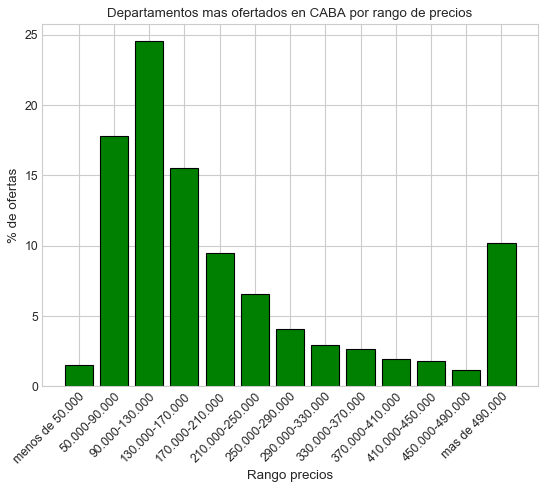

In [156]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()

ax.bar(precios_caba_cat_dptos.index,precios_caba_cat_dptos, color='green', edgecolor='black')

ax.set_xticklabels(precios_caba_cat_dptos.index,rotation=45,rotation_mode="anchor", ha="right")

ax.set(xlabel = "Rango precios", ylabel = "% de ofertas", title = "Departamentos mas ofertados en CABA por rango de precios")


plt.show()

<a id="section_intro"></a> 
### Venta casas y PHs CABA

 Distribucion por rango de precios en dolares sobre la cantidad de casas y PHs ofertadas en CABA.

[volver a TOC](#section_vis_2)

In [157]:
barrios_caba_lst = list(data.loc[data.state_name == 'Capital Federal','place_name'].unique())
mask_barrios_caba = data.loc[:,'place_name'].apply(lambda x: x in barrios_caba_lst)

In [158]:
casas_phs_mask = (data['property_type'] == 'house') | (data['property_type'] == 'PH')

barrios_caba_zonas = data.loc[(data['state_name'] == 'Capital Federal') & mask_barrios_caba & casas_phs_mask, :]

print(barrios_caba_zonas.shape[0], data.loc[data.state_name == 'Capital Federal','place_name'].shape[0] )

3424 29380


In [159]:
precios_caba_cat = pd.cut(barrios_caba_zonas.price_aprox_usd, precios_bins, labels=precios_bins_label)

In [160]:
precios_caba_cat.value_counts()

130.000-170.000    536
mas de 490.000     432
90.000-130.000     421
210.000-250.000    373
170.000-210.000    331
250.000-290.000    282
50.000-90.000      203
290.000-330.000    179
330.000-370.000    177
370.000-410.000    156
410.000-450.000    122
450.000-490.000     76
menos de 50.000     11
Name: price_aprox_usd, dtype: int64

In [161]:
precios_caba_cat_porc = round((precios_caba_cat.value_counts() / precios_caba_cat.value_counts().sum())*100,2)

In [162]:
precios_caba_cat_porc

130.000-170.000    16.25
mas de 490.000     13.09
90.000-130.000     12.76
210.000-250.000    11.31
170.000-210.000    10.03
250.000-290.000     8.55
50.000-90.000       6.15
290.000-330.000     5.43
330.000-370.000     5.37
370.000-410.000     4.73
410.000-450.000     3.70
450.000-490.000     2.30
menos de 50.000     0.33
Name: price_aprox_usd, dtype: float64

In [163]:
data['cat_precios_caba'] = precios_caba_cat
precios_caba_cat.value_counts().sum()

3299

In [164]:
precios_caba_cat_dptos = data.groupby('cat_precios_caba')['price_aprox_usd'].apply(lambda x: round(x.notnull().sum() / precios_caba_cat.value_counts().sum() * 100,2))

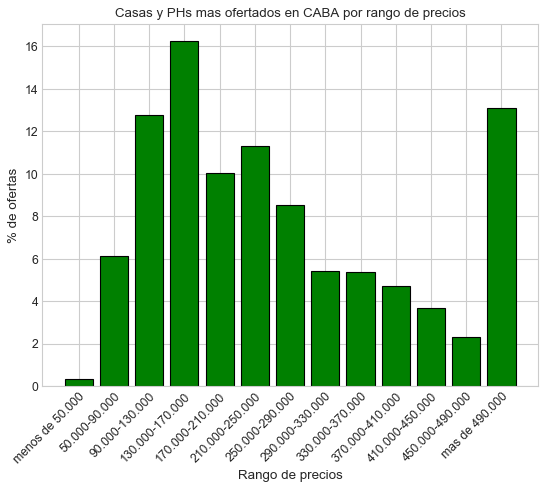

In [165]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()

ax.bar(precios_caba_cat_dptos.index,precios_caba_cat_dptos, color='green', edgecolor='black')

ax.set_xticklabels(precios_caba_cat_dptos.index,rotation=45,rotation_mode="anchor", ha="right")

ax.set(xlabel = "Rango de precios", ylabel = "% de ofertas", title = "Casas y PHs mas ofertados en CABA por rango de precios")


plt.show()

<a id="section_intro"></a> 
### Venta casas y PHs - Distribucion Capital Federal > Buenos Aires > Interior

 Distribucion por rango de precios en dolares la oferta de casas y PHs en Capital Federal, Provincia de Buenos Aires e Interior

[volver a TOC](#section_vis_3)

In [166]:
# Creacion de mascaras separando distritos.
mask_caba = data.state_name == 'Capital Federal'
mask_bsas = (data.state_name == 'Bs.As. G.B.A. Zona Norte') | (data.state_name == 'Bs.As. G.B.A. Zona Sur') | (data.state_name == 'Bs.As. G.B.A. Zona Oeste') | (data.state_name == 'Buenos Aires Costa Atlántica')
mask_inte = ~mask_bsas & ~mask_caba

In [167]:
# Creacion de mascara para agrupar departamentos y PHs
casa_ph_mask = (data['property_type'] == 'house') | (data['property_type'] == 'PH')

# Creacion de series
caba_zonas = data.loc[mask_caba & casas_phs_mask, :]
bsas_zonas = data.loc[mask_bsas & casas_phs_mask, :]
inte_zonas = data.loc[mask_inte & casas_phs_mask, :]

In [168]:
# Creacion de series de distribucion de rango de precios en dolares
precios_caba_cat = pd.cut(caba_zonas.price_aprox_usd, precios_bins, labels=precios_bins_label)
precios_bsas_cat = pd.cut(bsas_zonas.price_aprox_usd, precios_bins, labels=precios_bins_label)
precios_inte_cat = pd.cut(inte_zonas.price_aprox_usd, precios_bins, labels=precios_bins_label)

In [169]:
data['cat_precios_caba'] = precios_caba_cat
data['cat_precios_bsas'] = precios_bsas_cat
data['cat_precios_inet'] = precios_inte_cat

In [170]:
precios_caba_cat_dptos = data.groupby('cat_precios_caba')['price_aprox_usd'].apply(lambda x: round(x.notnull().sum() / precios_caba_cat.value_counts().sum() * 100,2))
precios_bsas_cat_dptos = data.groupby('cat_precios_bsas')['price_aprox_usd'].apply(lambda x: round(x.notnull().sum() / precios_bsas_cat.value_counts().sum() * 100,2))
precios_inte_cat_dptos = data.groupby('cat_precios_inet')['price_aprox_usd'].apply(lambda x: round(x.notnull().sum() / precios_inte_cat.value_counts().sum() * 100,2))

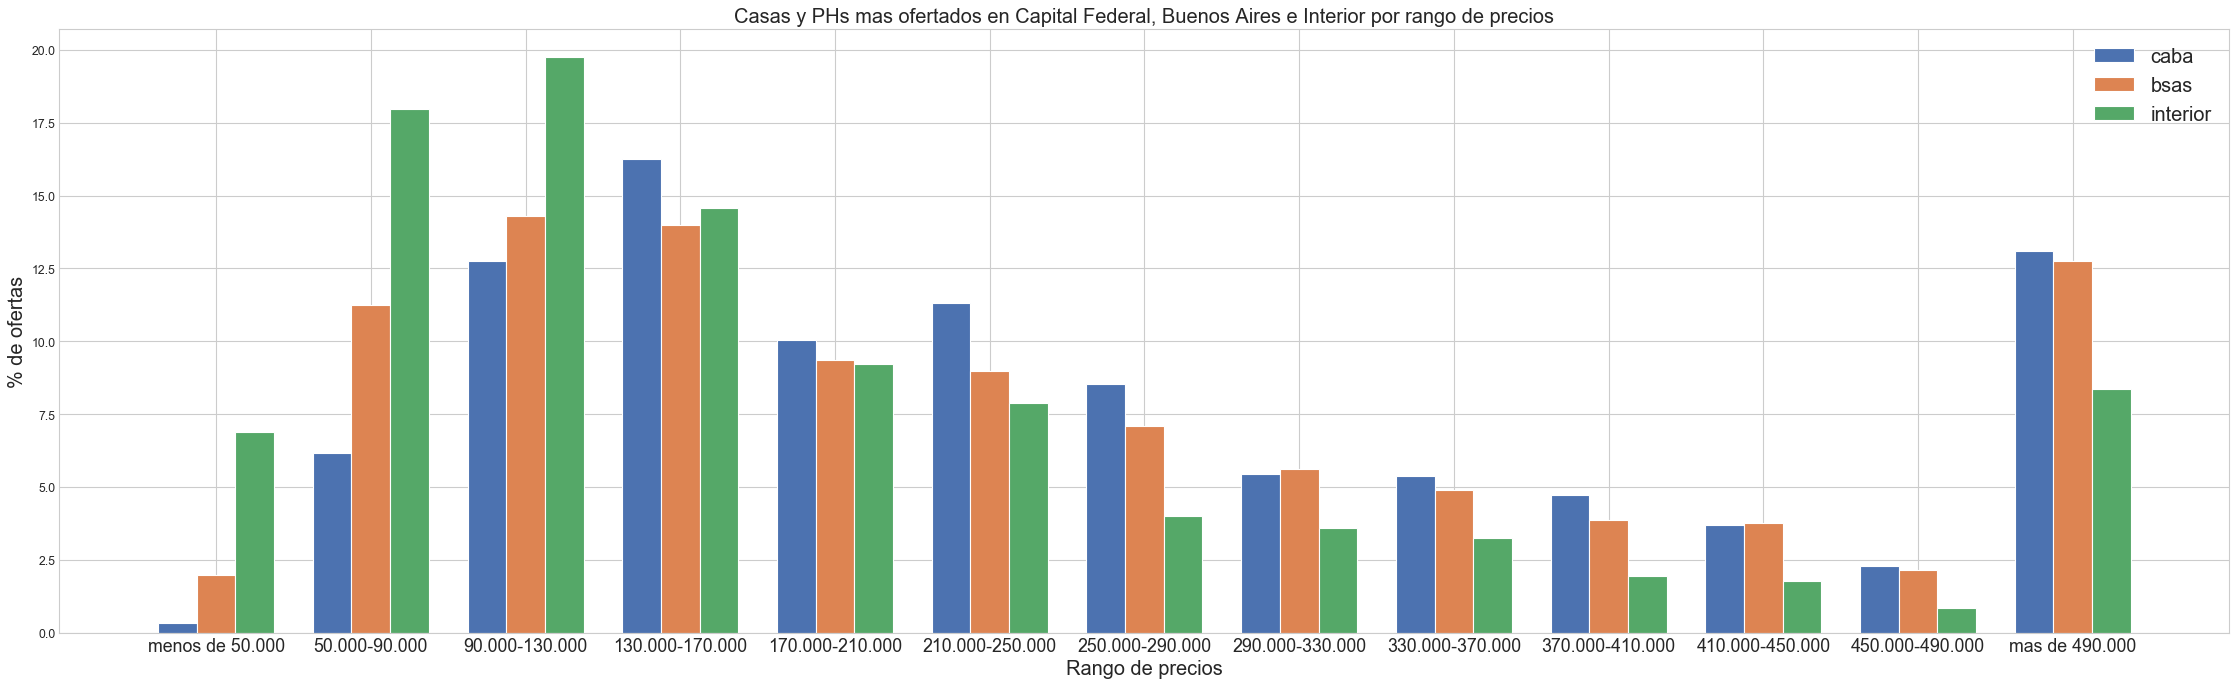

In [171]:
plt.style.use('seaborn-whitegrid')

# ancho columnas
barWidth = 0.25

# tamaño figura
plt.figure(figsize=(35, 10), dpi=80)
plt.axes()
 
# eje y - cantidad de ofertas
caba_bars = precios_caba_cat_dptos
bsas_bars = precios_bsas_cat_dptos
inte_bars = precios_inte_cat_dptos
 
# eje x - posicion en columnas
caba_x = np.arange(len(caba_bars)) # tomo como referencia el primer len ya que todos son iguales
bsas_x = [x + barWidth for x in caba_x]
inte_x = [x + barWidth for x in bsas_x]
 
# armado de plot
plt.bar(caba_x, caba_bars, width=barWidth, edgecolor='white', label='caba')
plt.bar(bsas_x, bsas_bars, width=barWidth, edgecolor='white', label='bsas')
plt.bar(inte_x, inte_bars, width=barWidth, edgecolor='white', label='interior')
 
# estetica labels y titulo
plt.xlabel('Rango de precios', fontsize=18)
plt.ylabel('% de ofertas', fontsize=18)
plt.title('Casas y PHs mas ofertados en Capital Federal, Buenos Aires e Interior por rango de precios', fontsize=18)
plt.xticks([r + barWidth for r in range(len(caba_bars))], precios_bins_label, fontsize=16)

# tamaño leyenda
plt.legend(prop={'size': 18})
plt.show()

<a id="section_intro"></a> 
### Venta Departamentos - Distribucion Capital Federal > Buenos Aires > Interior

 Distribucion por rango de precios en dolares la oferta de departamentos en Capital Federal, Provincia de Buenos Aires e Interior

[volver a TOC](#section_vis_4)

In [172]:
# Creacion de mascara para agrupar departamentos y PHs
dpto_mask = (data['property_type'] == 'apartment')

# Creacion de series
caba_zonas = data.loc[mask_caba & dpto_mask, :]
bsas_zonas = data.loc[mask_bsas & dpto_mask, :]
inte_zonas = data.loc[mask_inte & dpto_mask, :]

In [173]:
# Creacion de series de distribucion de rango de precios en dolares
precios_caba_cat = pd.cut(caba_zonas.price_aprox_usd, precios_bins, labels=precios_bins_label)
precios_bsas_cat = pd.cut(bsas_zonas.price_aprox_usd, precios_bins, labels=precios_bins_label)
precios_inte_cat = pd.cut(inte_zonas.price_aprox_usd, precios_bins, labels=precios_bins_label)

In [174]:
data['cat_precios_caba'] = precios_caba_cat
data['cat_precios_bsas'] = precios_bsas_cat
data['cat_precios_inet'] = precios_inte_cat

In [175]:
precios_caba_cat_dptos = data.groupby('cat_precios_caba')['price_aprox_usd'].apply(lambda x: round(x.notnull().sum() / precios_caba_cat.value_counts().sum() * 100,2))
precios_bsas_cat_dptos = data.groupby('cat_precios_bsas')['price_aprox_usd'].apply(lambda x: round(x.notnull().sum() / precios_bsas_cat.value_counts().sum() * 100,2))
precios_inte_cat_dptos = data.groupby('cat_precios_inet')['price_aprox_usd'].apply(lambda x: round(x.notnull().sum() / precios_inte_cat.value_counts().sum() * 100,2))

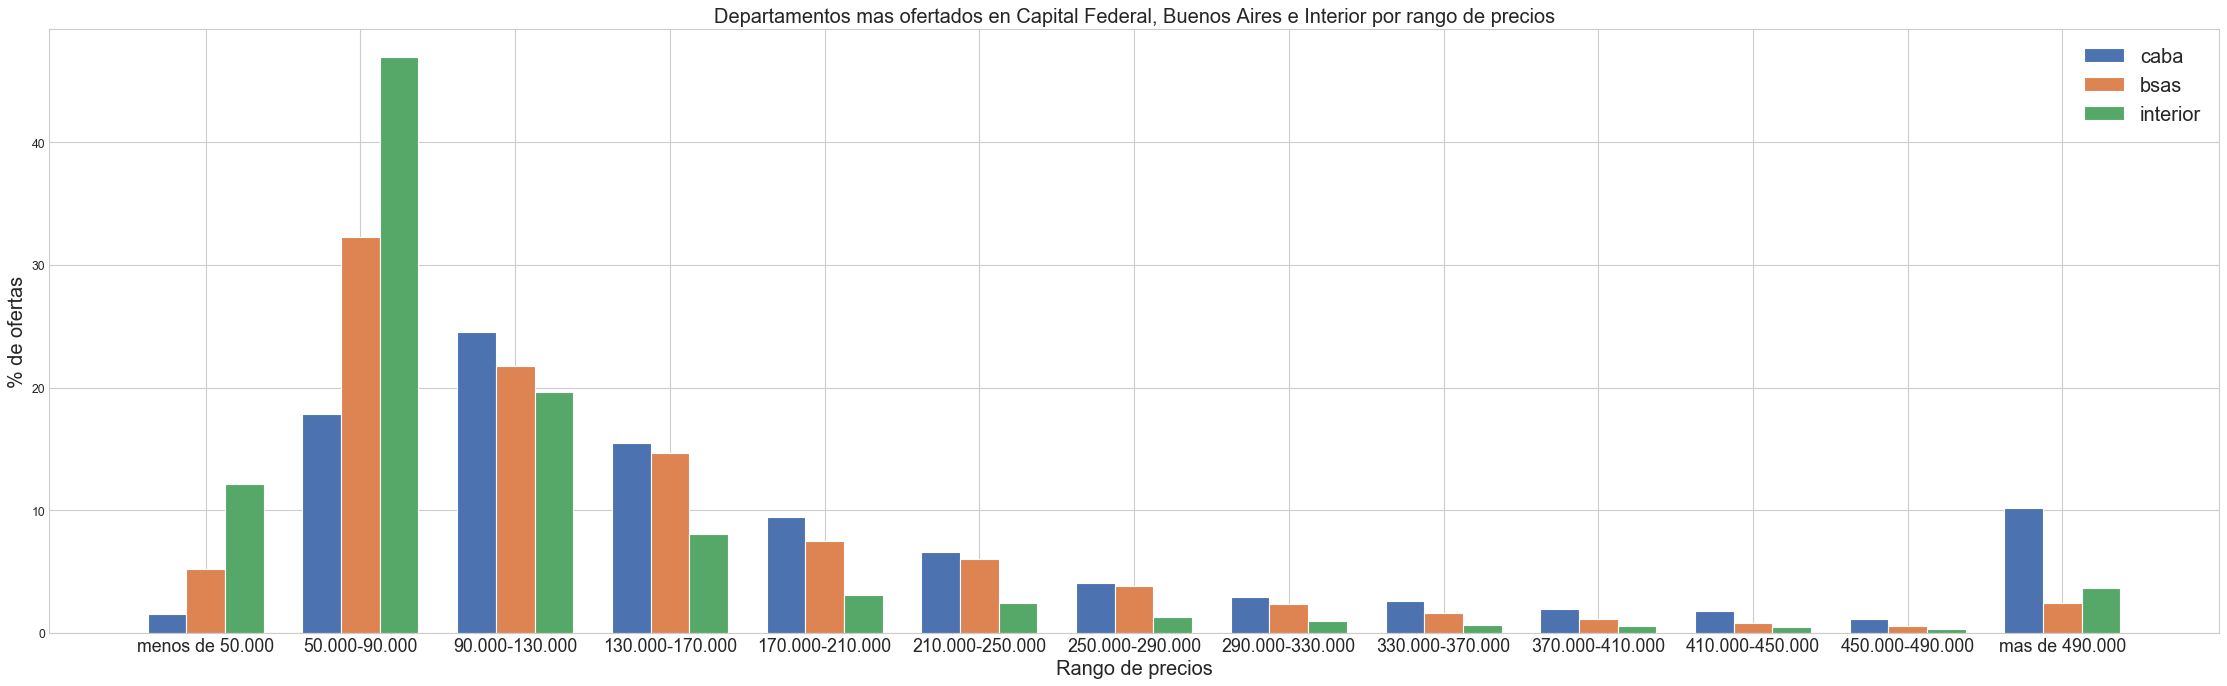

In [176]:
plt.style.use('seaborn-whitegrid')

# ancho columnas
barWidth = 0.25

# tamaño figura
plt.figure(figsize=(35, 10), dpi=80)
plt.axes()
 
# eje y - cantidad de ofertas
caba_bars = precios_caba_cat_dptos
bsas_bars = precios_bsas_cat_dptos
inte_bars = precios_inte_cat_dptos
 
# eje x - posicion en columnas
caba_x = np.arange(len(caba_bars)) # tomo como referencia el primer len ya que todos son iguales
bsas_x = [x + barWidth for x in caba_x]
inte_x = [x + barWidth for x in bsas_x]
 
# armado de plot
plt.bar(caba_x, caba_bars, width=barWidth, edgecolor='white', label='caba')
plt.bar(bsas_x, bsas_bars, width=barWidth, edgecolor='white', label='bsas')
plt.bar(inte_x, inte_bars, width=barWidth, edgecolor='white', label='interior')
 
# estetica labels y titulo
plt.xlabel('Rango de precios', fontsize=18)
plt.ylabel('% de ofertas', fontsize=18)
plt.title('Departamentos mas ofertados en Capital Federal, Buenos Aires e Interior por rango de precios', fontsize=18)
plt.xticks([r + barWidth for r in range(len(caba_bars))], precios_bins_label, fontsize=16)

# tamaño leyenda
plt.legend(prop={'size': 18})
plt.show()

In [177]:
data.drop(['cat_precios_caba', 'cat_precios_bsas', 'cat_precios_inet'], axis=1, inplace=True)

In [178]:
data.columns, data.shape

(Index(['Id_caso', 'property_type', 'place_with_parent_names', 'country_name',
        'state_name', 'lat-lon', 'lat', 'lon', 'price', 'currency',
        'price_aprox_local_currency', 'price_aprox_usd', 'floor', 'rooms',
        'expenses', 'description', 'title', 'Pais', 'Zona', 'Partido_barrio',
        'Localidad', 'Obs_localidad', 'place_name', 'geonames_id',
        'price_usd_per_m2', 'price_per_m2', 'surface_total_in_m2',
        'surface_covered_in_m2', 'cochera', 'piscina', 'parrilla', 'baulera',
        'balcon', 'terraza', 'jardin', 'lavadero'],
       dtype='object'),
 (102417, 36))